In [2]:
import sys
import os
import pprint as pp
import pandas as pd
import numpy as np
import math
from collections import defaultdict, Counter
import os
import glob
import xlrd

import itertools
import re
from dateutil import tz
from datetime import datetime

from openpyxl import Workbook
# from openpyxl.utils.dataframe import dataframe_to_rows
import matplotlib as plt
import seaborn as plt

# Stats
import scipy.stats as stats
from numpy.random import binomial

%matplotlib inline

# Display settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('max_columns',350)
pd.set_option('max_rows',200)
pd.set_option('max_info_columns', 350)
pd.set_option('max_info_rows', 350)

pd.options.mode.chained_assignment = None # Prevents error message from showing for copy/slices of dataframes

### Read in Data

In [3]:
assessment_protocol_errors = pd.read_csv('./Assessment_Protocol_Errors-Table.csv')#, index_col='assessment_uuid')
print("Assessment Protocol Errors")
assessment_protocol_errors.shape
assessment_protocol_errors.sample(15)

assessment = pd.read_csv('./Assessment-Table.csv')#, index_col='case_id')
print("Assessment")
assessment.shape
assessment.sample(15)

case_event = pd.read_csv('./Case_Event_Map-Table.csv')#, index_col='event_id')
print("Case Event Map")
case_event.shape
case_event.sample(15)

chw = pd.read_csv('./chw-Table.csv')
print("CHW Table")
chw.shape
chw.sample(15)

mm_raw_data = pd.read_csv('./Data_From_MUSO_MedicMobile_20180308.csv')
print("Raw from Muso")
mm_raw_data.shape
mm_raw_data.sample(15)

patient_case = pd.read_csv('./Patient_Case-Table.csv')#, index_col='case_id')
print("Patient Case Table")
patient_case.shape
patient_case.sample(15)

patient = pd.read_csv('./Patient-Table.csv')
print("Patient")
patient.shape
patient.sample(15)

treatment_fu = pd.read_csv('./Treatment_Follow_Up-Table.csv')#, index_col='event_id')
print("Treatment Follow Up")
treatment_fu.shape
treatment_fu.sample(15)

Assessment Protocol Errors


(55404, 30)

assessment_uuid  \
39627  8B3EE926-C24D-708A-A56E-11F1F3EB27B9   
24944  91C1B9F7-CF87-C68E-97D8-C50C548C4033   
26660  6B4CE2BA-6830-2988-B44F-CBC7D5B2B520   
42289  3BFE8E28-08BC-82C9-8D86-9CBED6C704A4   
54139  5B60A015-D9EA-A792-A4F4-9A9AADEA915D   
54705  5D3D87B1-F701-4528-88F3-204B4E8047B6   
41228  9262503C-6A63-0A7B-9741-C7E8205B7E6A   
25281  BF8D713D-48ED-9718-BD10-7D94154AD898   
17473  2E58DB8D-D76C-EA68-B383-7396CB8C934D   
16828  4383103B-EF82-1C02-A23A-73EF9AD2F228   
44842  AFBEA1D1-BDE1-FCFA-839A-76889C490E9B   
31622  91487168-12F6-CF10-A4D7-033103660214   
6857   3FAB3B95-B6AC-C446-932D-10D67E55A1DD   
32977  1234ACE0-3E57-3768-999C-EBD0845AC45A   
12129  C12F41C4-400B-43B9-880C-85EBE51887FB   

                                        chw  \
39627  e4fe5803-e31a-4304-ab1f-e66b653d5ed0   
24944  5732fcf3-967c-472b-b928-1dce2b9ff7cf   
26660  e3d4114a-23dc-4f60-a70f-77d6f4c958b0   
42289  567b7912-4be1-4fea-930e-2f22a46b0566   
54139  7a85696a-5a3a-4fbe-b541-0361ee658baf   
54705      fda753c1c37ef32fba0138a4c7bfb3ee   
41228  43029838-f03a-4f7f-89cf-54650c04e0f5   
25281  a1125214-75a0-49f5-80a3-b7f9b204c0eb   
17473  212e579c-5b08-41e6-abb1-24ff1451c324   
16828  5410fe0e-ea9c-4c25-9657-10a33f1ee26f   
44842  69bccd29-9e70-4219-b522-36b889161ec4   
31622  ef97b52c-a09b-4598-9a15-81ac63655b42   
6857       db91e797f2ce030419456e90ab7b87c6   
32977  cab4ed56-75a4-4889-9911-1cb7484b21f3   
12129  a6bc0a16-501f-4b9f-82bb-33d5e72d73a6   

                                   chw_area            formname  \
39627  59b20b90-3fdd-4c12-8fe4-8fcbe15389b9  patient_assessment   
24944  ed29dc2f-7e87-4d71-a0f5-87962156325f  patient_assessment   
26660  018906b4-d2a7-4308-87e1-4574fdeb498a  patient_assessment   
42289  860c433f-c2fe-43b2-be22-868f58eb8075  patient_assessment   
54139  bac8d7ac-88d7-41fc-a889-1eadfb4bb4be  patient_assessment   
54705  872e0ee1-3f9d-4f11-813e-868d471fe3f1  patient_assessment   
41228  18b6e963-93ed-4357-aa56-e743b4834725  patient_assessment   
25281  344f8028-90ff-4be7-97b7-142dbb5ef31b  patient_assessment   
17473  23fb8a8a-19e3-469e-b2e4-856846e46496  patient_assessment   
16828  19308624-1786-4609-8679-7829b9fee713  patient_assessment   
44842  062a5cf4-1ed6-4b36-af78-02fa521ac741  patient_assessment   
31622  364215ed-7547-4a44-a92c-60b9c6d29ebf  patient_assessment   
6857   cf27ba39-cdf3-4f49-b3c4-60cbbb5ba62b  patient_assessment   
32977  49af22cd-1842-4a54-bf20-72c05ef26507  patient_assessment   
12129  1954c808-161b-477f-a71f-16c126cd3053  patient_assessment   

       has_protocol_errors  number_of_protocol_errors  \
39627                 True                          4   
24944                 True                          3   
26660                 True                          2   
42289                 True                          6   
54139                False                          0   
54705                False                          0   
41228                False                          0   
25281                 True                          1   
17473                False                          0   
16828                 True                          4   
44842                False                          0   
31622                 True                          2   
6857                  True                          3   
32977                 True                          4   
12129                 True                          4   

       act_based_combination_without_positive_tdr  \
39627                                       False   
24944                                       False   
26660                                       False   
42289                                       False   
54139                                       False   
54705                                       False   
41228                                       False   
25281                                       False   
17473                                       False   
16828 

Assessment


(55400, 66)

case_id  \
8145   8A6D9024-7574-4268-BA8D-BEB31EDCAE93   
24382  ADB1238E-5B95-EF08-BBF3-28B866865061   
7434   E28F32B3-6D54-3488-8A04-AB381BB77C27   
8458   E260B717-7E7B-A566-A612-1107A29D4458   
26048  6FB41915-1C5F-7261-A26A-D2C98004C16E   
1396   9273D2EC-DF14-F6FC-AF46-7581592B0474   
3691   20E758BD-3CDC-B3DE-9180-969487BFB650   
16530  2D6DEDE7-E8D2-9B32-826E-7FD4B3B8C43A   
18235  9388D2DF-EBAF-539A-B8C1-D3037E72F583   
2044   1B8BFA50-2380-5A06-8A39-4FD09113D17B   
4844   1E1833A9-5CED-0336-99CC-7156077274C8   
45573  0FE6DE31-8A63-5951-8129-444E4E18BB83   
48412  20308B73-DBC9-D2DF-B607-A0F190646E0A   
17181  017D0B0A-D273-9F95-9327-E0123008FC98   
4095   1632BD08-1DFA-B5AE-BE8D-2CC4C155DFAD   

                                     chw_id  \
8145   9d88d8aa-3f2e-4d33-ad1c-1c7a03c8a30e   
24382  57ecf7ed-342c-4f16-8c67-cab063be9f6a   
7434   cebc5a8b-c659-4d72-bb56-184113c420c0   
8458   35e2ca64-4cb1-4175-83e0-299c048047e6   
26048  320b52f8-7bd3-46af-a3e4-24c040be4612   
1396   b458d09e-d6b5-418e-a2df-ba4fe32de3b3   
3691   4f2fa18f-9f9f-4c91-b08a-17a9911c2221   
16530  6d7ab543-72ba-4814-8904-1fdcd215d119   
18235  a7f09f1a-28f2-4afa-85b8-9d8bf918bafa   
2044   6af19842-1ab6-4851-a8ff-63f32325f4b8   
4844   8e7fd007-ce60-4725-a149-2c4a1e64bb04   
45573  29971658-99df-41c5-9577-748d8069742d   
48412  06c3ed64-e6d0-49fb-9c50-e360eb048583   
17181  f1ad16ae-7cfc-4187-a5b3-7f2436fb5c2c   
4095   b87d1fcf-898c-4d80-9824-7da53f00a3ae   

                              chw_parent_id  \
8145   012431eb-0f3f-416f-9b53-386cdc4bdec1   
24382  7e6fb98d-1215-4ef4-9342-58b77f0c716b   
7434   96d17eea-bc83-4706-be1d-3825751ed3fc   
8458   0d0b627b-563c-4719-967f-643cfde0bff4   
26048  dac29b40-cb6e-4231-849d-2590e81c6c4b   
1396   1c77fffc-d64b-4397-b973-6621ea3797d8   
3691   fdeaf5d5-9518-4511-9f14-007afe72f0d1   
16530  d9e48654-c5ae-4d21-aeed-eaaf641fe267   
18235  a8ea9701-1873-4025-9c9f-f9d1a1fc48db   
2044   795d76ac-714d-4396-8ec7-602839438cd4   
4844   59b8ec3e-1df4-4db4-9d08-c9dc34c5829c   
45573  edee37fa-1c0d-4d4d-b4ed-927fc2a365f2   
48412  2ba7416b-04ba-43b8-9faa-2875de05a86d   
17181  65b9abc5-5dc0-4a49-9c24-a71383921720   
4095   698327c8-4f98-42e8-ad02-7add8b43ec03   

                                 patient_id                reported  \
8145   2c508c99-da30-4716-95eb-c851af1e65f9  2017-04-10 10:49:02+00   
24382  fa6d15ca-e0dd-47cb-98ef-c1f89ab714e3  2017-07-29 21:57:44+00   
7434   070444cf-252f-449a-bb7d-01c5d024f372  2017-04-04 10:08:26+00   
8458   74da74af-6f6b-4c50-a7ab-3c5342dd3873  2017-04-12 10:42:55+00   
26048  71841d07-b7e5-400c-ac17-fb6315ab0c54  2017-08-07 17:55:30+00   
1396   1c127d5f-0770-4dc5-8621-dd3b558b1c65  2017-03-01 13:15:33+00   
3691   0e686f7e-e9ad-4302-a98e-3b38741064a3  2017-03-10 11:09:35+00   
16530  96675789-a09e-4cbd-944d-8f10217ef65c  2017-06-13 08:13:56+00   
18235  b0cd8abf-da0e-48f5-acf1-1c5d13675bd8  2017-06-27 07:38:05+00   
2044   9376C0CA-9FF6-0780-877A-20BFBE508A23  2017-03-03 11:05:35+00   
4844   47A8B6CB-8B01-09C6-B5A3-E08157764FEC  2017-03-18 10:10:02+00   
45573  4F9A0198-CA3C-424D-9CA4-EE70D218D048  2017-12-18 08:59:38+00   
48412  E7AD8A8F-1E04-1525-9BDA-F0279D6963F6  2018-01-09 09:45:00+00   
17181  ba88c65d-94fe-41c0-b00a-67121e042136  2017-06-16 18:38:42+00   
4095   9005afa9-3b75-4a0c-af0d-e3022e31b790  2017-03-13 09:48:37+00   

              how_child_found        when_assessed when_illness_began  \
8145   accompanied_by_parents  c_assessment_time_1   c_when_illness_8   
24382              home_visit  c_assessment_time_4   c_when_illness_6   
7434               home_visit  c_assessment_time_1   c_when_illness_2   
8458   accompanied_by_parents  c_assessment_time_1   c_when_illness_4   
26048  accompanied_by_parents  c_assessment_time_4   c_when_illness_8   
1396   accompanied_by_parents  c_assessment_time_1   c_when_illness_3   
3691               home_visit  c_assessment_time_1   c_when_illness_8   
16530  accompanied_by_parents  c_assessment_time_1   c_w

Case Event Map


(37135, 4)

case_id    fu_type  event_number  \
14499  9F1E02C5-C808-D101-9780-7D1DEB10B5EC  treatment             4   
4500   30B58D03-3A5E-2CD0-9C69-7A5540AD293E  treatment             3   
9311   6674F410-1274-6A4F-9EE6-0D11750C22DA  treatment             1   
15700  AB984519-9BAD-1608-9FCC-C3B90E7B99BF  treatment             3   
35825  E6E4959C-48C2-5667-A76D-A06A31CE1351   referral             1   
23145  FB65985B-C38C-9995-BDC8-39015F48BF9F  treatment             1   
32688  AC3F3831-64DB-0D63-9477-DC294367AB9E   referral             1   
27856  4F99C401-93B2-BE58-8572-242D46666467   referral             1   
31409  937ED94D-5B60-ACB2-99B4-11B5AE687AC6   referral             1   
14089  9A0A0D4E-F4D1-F893-8975-8E5D3A43E415  treatment             2   
2296   1876D0FF-7723-B435-ADBF-AF4A569128A3  treatment             3   
13873  97EB1788-E654-6919-A9DC-75BDD1DD4D2A  treatment             2   
12629  8AD16744-705C-C451-93F1-160AC4595BFC  treatment             1   
3846   2961A39B-22D7-0C02-8ED4-3B4748FB2D0D  treatment             1   
28680  5F484B12-1698-CEF1-AE68-4CF6F588F5E5   referral             1   

                                   event_id  
14499  745BDB7C-E467-41DA-A42D-292B2BB216E4  
4500   8227C8FF-E5F4-F727-A29D-EC206D45CA71  
9311   FAFC2F5F-E260-FE5B-8E22-9367CCEC088F  
15700  6818AAF6-868D-D745-B776-2E9410455317  
35825  02AD65B2-8860-4B44-A611-1C70C2F3E30A  
23145  B99650BA-FCB9-20D1-803B-2D3039CD224F  
32688  FD896E41-3DED-B7C0-AC16-82BE0F138E32  
27856  B7D7BB34-9E3C-983B-BC96-F84A1E782253  
31409  07A7C139-947A-6C94-B189-623FA8F2C9ED  
14089  98A71143-A36C-03A0-822B-C125CEAA103D  
2296   2131841D-5BA9-D50A-8804-FB2BC58F5505  
13873  578B447F-0143-0949-A161-3AFD91F8CDF5  
12629  692924C6-817C-5942-ADFE-1C386667FE03  
3846   54B450F9-D76C-CE1A-A20C-B25318C9A8AA  
28680  47B1B633-BEB7-4B2D-812C-A769B3231AAC

CHW Table


(402, 5)

chw_id  \
153  40713116-fd23-4ba2-8a0f-825a539050f1   
124  4a38375c-a83a-405a-9074-23a32ae15c6a   
280  567b7912-4be1-4fea-930e-2f22a46b0566   
384      db91e797f2ce030419456e90ab7ad878   
357  2f4520b0-071c-49a4-a459-a8260086ae12   
161      fda753c1c37ef32fba0138a4c7c0fab5   
192  00499112-ebe5-4dab-8eb4-5d35cd73450b   
257      fda753c1c37ef32fba0138a4c7c51c90   
130      db91e797f2ce030419456e90ab783665   
35       db91e797f2ce030419456e90ab769e6a   
148  71e245a4-6170-481c-aacb-440a7d17fa43   
300  06c3ed64-e6d0-49fb-9c50-e360eb048583   
209  cc278bb4-2fc5-42c8-ba4e-bcc338275d73   
208      3f0fce86e571a1275c338749fb1bc506   
400      fda753c1c37ef32fba0138a4c7c41d22   

                                parent_id  with_errors  total_assessments  \
153  698e3130-1d83-4f3f-9456-393f7d2b0db4          380                497   
124      74a7f78eef4f8baa9de4e11cd23884b5          150                210   
280  f97be09e-7f56-4d1a-9b27-040d27cda9d6          193                241   
384  fc9f1944-d59d-4a20-bafa-e6fb7b50255a           18                 50   
357  117ea7d3-e7f6-4f48-8deb-be3734ad57f8          109                146   
161  fc9f1944-d59d-4a20-bafa-e6fb7b50255a           76                161   
192  da21c557-c768-4540-a8ac-28a1df06e350          101                132   
257  fc9f1944-d59d-4a20-bafa-e6fb7b50255a           55                 66   
130  fc9f1944-d59d-4a20-bafa-e6fb7b50255a           20                 28   
35   fc9f1944-d59d-4a20-bafa-e6fb7b50255a            6                 14   
148  59c35915-c608-46bf-8fc2-87ff77456af6          121                212   
300      3d2d7ee1f34a416f6bc94ada35a9dd2e          185                417   
209  014b4b90-5b36-4b76-adb5-98ac2f443e1b          174                244   
208  fc9f1944-d59d-4a20-bafa-e6fb7b50255a           11                 31   
400  fc9f1944-d59d-4a20-bafa-e6fb7b50255a            6                 10   

     percent_without_errors  
153                   23.54  
124                   28.57  
280                   19.92  
384                   64.00  
357                   25.34  
161                   52.80  
192                   23.48  
257                   16.67  
130                   28.57  
35                    57.14  
148                   42.92  
300                   55.64  
209                   28.69  
208                   64.52  
400                   40.00

Raw from Muso


/Users/veenakumar/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,32,35,52,94,97,100,112,124,126,142,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(27470, 167)

CensusID  village  menage  SexeFinal  AgeAnFinal  LDP  concession  \
10422  10001906000       10       6          1        27.0  1.0          19   
24848  17055301200       17       1          1        26.0  2.0         553   
22594  17047304001       17       4          2         6.0  1.0         473   
5309    5004801102        5       1          1        18.0  3.0          48   
24222  17053502000       17       2          1        31.0  1.0         535   
2073    2005602103        2       2          1         9.0  3.0          56   
8788    7004905000        7       5          1        44.0  1.0          49   
10461  10002102000       10       2          1        54.0  1.0          21   
22841  17048802102       17       2          1         6.0  3.0         488   
22420  17046903101       17       3          2         3.0  3.0         469   
25619  17160202200       17       2          1        32.0  2.0        1602   
1458    2000501101        2       1          1         5.0  3.0           5   
9035    7006701103        7       1          2         6.0  3.0          67   
18758  17023901104       17       1          2        10.0  3.0         239   
21862  17043901200       17       1          2        38.0  2.0         439   

       Var_103  var_104  var_105  var_105_1  var_106 var_106_1  var_107  \
10422      NaN      NaN      NaN        NaN      NaN       NaN      NaN   
24848      1.0      6.0      1.0        NaN      1.0       NaN      1.0   
22594      NaN      NaN      NaN        NaN      NaN       NaN      NaN   
5309       NaN      NaN      NaN        NaN      NaN       NaN      NaN   
24222      NaN      NaN      NaN        NaN      NaN       NaN      NaN   
2073       NaN      NaN      NaN        NaN      NaN       NaN      NaN   
8788       NaN      NaN      NaN        NaN      NaN       NaN      NaN   
10461      NaN      NaN      NaN        NaN      NaN       NaN      NaN   
22841      NaN      NaN      NaN        NaN      NaN       NaN      NaN   
22420      NaN      NaN      NaN        NaN      NaN       NaN      NaN   
25619      1.0      2.0      1.0        NaN      1.0       NaN      1.0   
1458       NaN      NaN      NaN        NaN      NaN       NaN      NaN   
9035       NaN      NaN      NaN        NaN      NaN       NaN      NaN   
18758      NaN      NaN      NaN        NaN      NaN       NaN      NaN   
21862      1.0     12.0      1.0        NaN      1.0       NaN      1.0   

       var_130  var_131 var_131_1  var_142  var_143  var_800  var_801  \
10422      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
24848      2.0      1.0       NaN      1.0      2.0      2.0      NaN   
22594      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
5309       NaN      NaN       NaN      NaN      NaN      NaN      NaN   
24222      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
2073       NaN      NaN       NaN      NaN      NaN      NaN      NaN   
8788       NaN      NaN       NaN      NaN      NaN      NaN      NaN   
10461      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
22841      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
22420      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
25619      2.0      1.0       NaN      2.0      2.0      2.0      NaN   
1458       NaN      NaN       NaN      NaN      NaN      NaN      NaN   
9035       NaN      NaN       NaN      NaN      NaN      NaN      NaN   
18758      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
21862      2.0      1.0       NaN      1.0      2.0      2.0      NaN   

       var_802  var_803  var_803_1 var_803_2  var_401  var_402  var_403  \
10422      NaN      NaN        NaN       NaN      NaN      NaN      NaN   
24848      NaN      NaN        NaN       NaN      NaN      NaN      NaN   
22594      NaN      NaN        NaN       NaN      NaN      NaN      NaN   
5309       NaN      NaN        NaN       NaN      NaN      NaN      NaN   


Patient Case Table


(55400, 39)

case_id  \
11641  036A52C9-D166-6213-8553-6002426EB2BA   
18025  4FE3C864-9C93-C8FA-82BB-B6AF225A255E   
37318  CFF6F37F-E69A-F61F-A354-6E9891D73168   
53716  F708FA95-7B23-046B-B480-ACFD66B1A4BE   
937    06633F96-8723-FBA9-B87B-D91A6068C44F   
5345   4E96C3C8-BD36-C574-99FC-9D95199FBA6B   
52377  5D16597C-D832-1892-A2D7-D3F78F444A7A   
51418  27EC4FB9-F578-8927-9BBC-118FE5EC35F3   
30088  595E775E-6E5A-F9E6-84A1-2C9F675B6292   
33428  5E20C228-8267-17A4-9B26-3A9CF71D9763   
27165  9E47CCD4-6E09-C7DE-9B17-D43E1E3158B9   
37873  BF8B268A-56E8-DDA2-9876-5F58ECB7D2C6   
28402  424C79CD-09E1-2564-8C98-946647E26E11   
52459  FFC8A720-0920-B1F4-B3B6-931BB29CC6D2   
42460  B611606C-A96D-E098-95CF-021EE424CCCE   

                                 patient_id  \
11641  24100D0B-DD29-F545-8E2A-903215DCB36E   
18025  37937F0D-4688-C23D-8ECC-4E8A4051B4D5   
37318  bcd48f24-d993-46fd-ba07-dcc37ae458d4   
53716  DF0B0028-3A1B-B49D-80CB-BABE5464A46F   
937    B86585EB-17B5-9183-8187-7F49FC970E18   
5345   c0531875-e1ff-4811-b88c-c67170973fb1   
52377  698ca2b7-29bf-42b0-bde6-ef803ee39479   
51418  d1275f8e-e338-46df-aa49-53f979e3d943   
30088  5C20BF10-DADD-9A53-B024-B4FA80746D68   
33428  55576ab8-d038-4505-a799-96d7a5d3eb01   
27165  8C86B87F-7CD1-3482-88D1-4A61929EAC73   
37873  6DEAA8AC-EA32-30F0-B43B-04B3F66294B4   
28402  5DE4AC74-17FA-50A7-8A9D-A970427CE791   
52459  8d36fded-e1b8-4025-bad8-28b5ef813a51   
42460  8635F738-9563-3B8D-8BE9-B306A1380199   

                                     chw_id         how_child_found  \
11641      db91e797f2ce030419456e90ab783665              home_visit   
18025      fda753c1c37ef32fba0138a4c7c3d039              home_visit   
37318  b87d1fcf-898c-4d80-9824-7da53f00a3ae  accompanied_by_parents   
53716      3f0fce86e571a1275c338749fb1be2a7  accompanied_by_parents   
937    43029838-f03a-4f7f-89cf-54650c04e0f5              home_visit   
5345   45004038-1df7-4741-a240-2c508430a161  accompanied_by_parents   
52377  cf72ea2a-66cd-4424-a950-477bf8323873  accompanied_by_parents   
51418  d1611082-dd43-49ae-946a-cce99b07f546  accompanied_by_parents   
30088  cebc5a8b-c659-4d72-bb56-184113c420c0              home_visit   
33428  9461a54e-e4a5-420e-8009-f3d5bc35618a  accompanied_by_parents   
27165  56d8c508-e4e7-4b3d-a091-30e5b6a988af              home_visit   
37873  d19a7b21-58fd-4236-ac27-f4b2798c10f1              home_visit   
28402  69bccd29-9e70-4219-b522-36b889161ec4  accompanied_by_parents   
52459  e4fe5803-e31a-4304-ab1f-e66b653d5ed0  accompanied_by_parents   
42460      fda753c1c37ef32fba0138a4c7c47d2e              home_visit   

             when_assessed when_assessed_en when_illness_began  \
11641  c_assessment_time_1          Morning   c_when_illness_2   
18025  c_assessment_time_1          Morning   c_when_illness_1   
37318  c_assessment_time_1          Morning   c_when_illness_7   
53716  c_assessment_time_4          Evening   c_when_illness_5   
937    c_assessment_time_1          Morning   c_when_illness_2   
5345   c_assessment_time_1          Morning   c_when_illness_1   
52377  c_assessment_time_4          Evening   c_when_illness_8   
51418  c_assessment_time_4          Evening   c_when_illness_7   
30088  c_assessment_time_1          Morning   c_when_illness_2   
33428  c_assessment_time_1          Morning   c_when_illness_7   
27165  c_assessment_time_1          Morning   c_when_illness_1   
37873  c_assessment_time_1          Morning   c_when_illness_1   
28402  c_assessment_time_1          Morning   c_when_illness_8   
52459  c_assessment_time_4          Evening   c_when_illness_4   
42460  c_assessment_time_2             Noon   c_when_illness_2   

                     when_illness_began_en  count_treatment_follow_ups  \
11641                           Last night                           1   
18025                                Today                           0   
37318                       Three days ago                           0   
53716  Evening of the day before yesterd

Patient


(172030, 8)

patient_id  \
170110  BC9B663A-3C90-FD1E-863F-B5E6AE5C7F0E   
140361  33635541-53DB-0479-85E7-6BCCC02AD522   
160995  E1BA3BF4-2EB6-BE76-88CC-E2CE5297830F   
123356  7CB38007-0252-E255-854E-724632B6266A   
15451   a7c1de3f-b072-4d5e-8dde-fab0c07bae32   
12234   6640d4ad-1caf-4d21-b7a6-c6df87e764d7   
131786  E586B859-0B83-471F-AE86-75A00C914499   
59098   2e8e0b4d-7580-48b9-86b3-5327f84f1b8b   
39408   eddecd16-1df2-45f9-a27e-b2e4ae2e0ff7   
120095  0b299ea8-0533-4b2f-9b40-1ae2f0cdfe77   
29017   6e2d45d3-d4a9-4605-a2f3-b772ee400b2b   
76062   9672f353-fb7c-4260-bed5-f3f69d531d17   
138969  AF38EDD2-C88E-0CD3-9781-C3351A0F66D1   
10362   b1b2c130-e8db-4301-be03-d73c6e9a92ab   
734     e043ddb3-5d0d-4d7e-86b3-f22ccf9a3e91   

                                   family_id  \
170110  EBEB4C42-4D58-26A1-9E79-165EB3B993AB   
140361  59984089-26e3-4b57-8bb2-65e0025998a5   
160995  6E8C4EE2-1D65-B8D9-A1B3-B0799D7378A5   
123356  21d0967f-7110-41cd-8263-2870d374aed3   
15451   909d5647-cde6-4b9c-af93-40b54e41b995   
12234   b4492d8f-edff-444b-8987-c25961bb9fdc   
131786  6a612f1c-7932-4507-98cf-aeb8a9ff58b3   
59098   92aff615-d659-41a0-9e21-e0b7f5f287f3   
39408   75c48eac-f696-4a42-9b99-e473902ae8a0   
120095  9c973c88-3a00-475d-b668-119da32cffe7   
29017   94abb67b-5c2d-4804-a8d0-a2d89078d3dd   
76062   396e5eea-a41d-4a86-b06c-63d82b27dcd0   
138969  74ef4b88-fea4-445a-94af-d84dd2495aec   
10362   5bb0079e-fe12-4ba3-bd81-500847fd14bd   
734     fc969bfe-01db-497c-9232-9fb5240a0116   

                                      chw_id date_of_birth    sex  \
170110      a398efbec9a12330f4f48fe6c6515801    1984-02-29  femme   
140361  cf72ea2a-66cd-4424-a950-477bf8323873    1995-01-25  homme   
160995      fda753c1c37ef32fba0138a4c7858963    1988-02-20  femme   
123356  090bf1df-c359-4f1b-aa2c-c72cbe0c6847    2015-02-24  homme   
15451   cb945f25-7db0-45e3-976e-3a7c52cd047e    1989-01-01  homme   
12234   aecd6881-9420-42e2-a937-4111e2d41307    2000-01-01  femme   
131786  cebc5a8b-c659-4d72-bb56-184113c420c0    2017-07-30  femme   
59098   acafb388-84ef-4d36-92b2-6c9af8cf1ffe    2004-12-31  Femme   
39408   6dae3ef1-a617-4a3c-8c42-fa7b744bb16c    2003-12-31  Femme   
120095  567b7912-4be1-4fea-930e-2f22a46b0566    1966-12-31  Femme   
29017   cf72ea2a-66cd-4424-a950-477bf8323873    2002-12-26  Homme   
76062   518eca12-50ab-4eee-be07-6bd7c8b3608d    2014-12-01  Homme   
138969  57ecf7ed-342c-4f16-8c67-cab063be9f6a    2014-06-04  femme   
10362   3be19c44-e84f-46ee-ae0d-9470e3498825    2001-01-01  homme   
734     b08165f4-b1fc-4073-9504-94bc9cff3f83    1983-01-01  homme   

        external_id  imported                reported  
170110          NaN     False  2018-02-28 16:28:50+00  
140361          NaN     False  2018-01-25 16:01:43+00  
160995          NaN     False  2018-02-19 20:29:42+00  
123356  05003102104     False  2017-02-24 11:58:00+00  
15451   17034702000     False  2016-11-12 03:11:34+00  
12234   15003002104     False  2016-11-12 01:15:45+00  
131786          NaN     False  2017-08-09 14:46:48+00  
59098   01021701104      True  2017-02-25 06:00:22+00  
39408   42002002202      True  2017-02-19 19:43:11+00  
120095  68004102200      True  2017-02-26 20:36:00+00  
29017   07001704101      True  2017-02-25 07:15:43+00  
76062   36001905104      True  2017-02-25 10:50:44+00  
138969          NaN     False  2017-04-04 10:47:21+00  
10362   12000701105     False  2016-11-11 18:24:30+00  
734     04000203000     False  2016-11-10 23:25:31+00

Treatment Follow Up


/Users/veenakumar/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(23561, 33)

case_id  event_number  \
17345  BBDF6D4A-2CD4-9344-8E83-1177DC946982             1   
10814  76C51652-3A46-D923-815F-7CAE373A18B4             1   
6497   471DC976-D13B-1D0C-8E45-FE8CA43F1136             1   
19682  D54CF2CF-CF9C-D638-A33C-F7CAB82109B7             1   
8310   5BAF8A3F-30B7-E110-9CE6-87306EEE281A             1   
14330  9CFD7498-A191-85B4-9C23-6F89DA5DD063             4   
23335  FDA89780-BC89-635D-A02A-2C3A51B27E86             1   
18568  C89F079D-C484-AA6D-837E-0EC5CA7FD2E8             1   
1374   0EEB22AF-84FB-E228-9999-7D4930909053             1   
2229   17CA71EF-1E22-1F04-9724-69B04B9FA096             2   
7365   50DD4B31-CDFD-A6CB-A9E2-D0C5AF6CC2F2             1   
5732   3E9BF5E6-4ABA-0D1A-BA14-AF8FB1543C46             3   
2061   15CBC837-2311-5A21-A62C-4C4015AE3E5E             2   
19686  D54DCB78-91E7-C13B-A153-6D9BE9493945             4   
13390  928AF315-6024-7DC8-AB23-30A86DBC944D             1   

                                   event_id  \
17345  6F8EB6BB-4EAA-81BC-ACE0-93C903385E64   
10814  9062826A-BABA-AA4B-A3FD-AC2449D84363   
6497   10063991-988A-1B2E-9965-06F06B675803   
19682  51257DED-2B20-783B-9B1D-232F090B0BC1   
8310   EC219372-F570-BCD0-B57A-595847266093   
14330  BE02E61C-4C69-FF5C-879A-61B5C193221A   
23335  3AF72E3E-D871-7D42-BCA1-210868D58A55   
18568  7AF7883F-CC93-BFCD-B387-8C64683063A6   
1374   FF8FFC9F-A287-6C36-989F-5464853FC354   
2229   19692EF4-F3BA-8895-8324-4C6419610E9B   
7365   7D18476E-471E-5436-9D3E-EB5B318B495E   
5732   51F27A36-49BA-8354-8A5E-9DD43976AEAE   
2061   58C9E415-8412-F649-AD4A-5A2940C7BC0E   
19686  BBDE7BC3-C8B9-D4CF-9D52-97805EB024B4   
13390  83850765-CC3F-618D-930E-8CAA46CFC816   

                                     chw_id  \
17345  840b2728-463b-4ff0-983e-f0d24af1d87e   
10814  5ba0b402-23c3-405b-90d1-bc776c212e54   
6497   654c6596-7237-4f3c-a1ce-af3f46adb935   
19682  aecd6881-9420-42e2-a937-4111e2d41307   
8310   43029838-f03a-4f7f-89cf-54650c04e0f5   
14330  4066b09f-c058-4ac1-930b-a309307516e6   
23335  327921c4-1948-4fc2-ac1a-23bbca2de7f2   
18568      a398efbec9a12330f4f48fe6c6556c46   
1374   e4fe5803-e31a-4304-ab1f-e66b653d5ed0   
2229   4f2fa18f-9f9f-4c91-b08a-17a9911c2221   
7365   4ad43fd0-107c-4f32-916b-0dec59300de6   
5732   9080ba42-2c5b-436a-b4ab-5fc1ceac6a89   
2061   cebc5a8b-c659-4d72-bb56-184113c420c0   
19686      3f0fce86e571a1275c338749fb1c1daa   
13390  5b0f5b8d-b6c4-4f59-90c9-4b09140ced96   

                              chw_parent_id  \
17345  958c8ea7-4d9f-454b-ae91-060829f56b61   
10814  28777c39-4bb8-45d0-bce6-6f8260e6e47e   
6497   25e31603-9243-4e99-8312-356f19235d9d   
19682  27cd3d72-5bcd-407f-9f7c-8dc3d7b33803   
8310   18b6e963-93ed-4357-aa56-e743b4834725   
14330  47e42cd7-0408-4abd-bc1e-3a18e6465787   
23335  0301418a-5658-48f5-bae6-1e42922e9e6c   
18568      a398efbec9a12330f4f48fe6c6558bee   
1374   59b20b90-3fdd-4c12-8fe4-8fcbe15389b9   
2229   fdeaf5d5-9518-4511-9f14-007afe72f0d1   
7365   83a481b5-cae5-4312-bcac-af76c2d197f1   
5732   d3386aff-1e10-4970-98f7-fbec48cc4c94   
2061   96d17eea-bc83-4706-be1d-3825751ed3fc   
19686  0dd2f79f-6474-4717-b267-7690e30972e2   
13390  5ce0b8e9-90f8-4ab0-b802-35c677c84476   

                                 patient_id                reported  \
17345  717a6e02-657a-4252-b7cf-e58ff5624b35  2017-11-02 11:19:05+00   
10814  8090db88-fb36-4a32-9a74-bb0e9418c045  2017-07-12 20:37:17+00   
6497   C0565DBE-38C7-D3A7-82BD-398CF7056678  2017-09-20 18:20:46+00   
19682  d363e0f3-5979-442c-b5fb-15fb3c7c3905  2017-10-25 09:53:25+00   
8310   562aa29a-1967-4603-a07e-515f9457c27c  2017-07-29 18:34:08+00   
14330  8bd01e8b-871b-4801-88a4-bc2c2fa0a74b  2018-01-22 09:22:52+00   
23335  8339217B-4645-71C6-9E6B-AE6AC4666DC0  2018-01-28 20:46:58+00   
18568  44A18B79-B5F9-FF5F-903F-446BF6A43F0E  2017-08-01 20:33:03+00   
1374   255554aa-cadb-4dfe-b423-3d715874a4c3  2017-06-07 16:46:05+00   
2229   caf129b3-dcf0-4f47-bb35-b1e09ce33530  2017-10-31 09:15:31+00   
7365   97B408EA-175

In [4]:
all_tables = {"ape": assessment_protocol_errors, 
              "a": assessment, 
              "ce": case_event, 
              "chw": chw, 
              "muso": mm_raw_data, 
              "ptcase": patient_case, 
              "pt": patient, 
              "tmt": treatment_fu}

for prefix, table in all_tables.items():
    table.columns = ["{}_{}".format(prefix, col) for col in table.columns]

#### Unique Cases  
**Table**: `Assessment`

In [11]:
assessment['a_case_id'].nunique()
assessment['a_case_id'].sample(10)

55400

52959    A7BF2D1E-E45B-F733-9E46-5AA72AB90EB1
21715    4A38B6BD-D027-D943-AD47-E9CAA4BAF3CE
9020     94FEABAA-C973-7BA4-B993-F92945136046
53319    2658BA8D-CFD4-36E5-9500-F45073541012
3337     4A5E1060-0E98-CF3A-BB91-A9C8448BFA22
43076    BD43174D-EF9C-3249-8EAB-024F36C918B8
25014    D427BFFD-F3F1-CCA0-BD06-9CDC68F0CA07
27496    11BD6D7B-2959-7B13-AF9C-0F08C1F746B9
5078     C8501521-7971-DB05-A4C3-8D4BF5BB6593
6591     BBFEC400-E6B1-22F4-9639-DF4DBB3209C0
Name: a_case_id, dtype: object

#### Cases With Health Issue  
**Table**: `Patient Case`

In [31]:
pt_case_have_disease = patient_case[patient_case[['ptcase_treat_ari',
                                                  'ptcase_treat_malaria',
                                                  'ptcase_treat_diarrhea']]
                                    .any(axis=1)]
pt_case_have_disease['ptcase_case_id'].nunique()
pt_case_have_disease.sample(5)

20644

ptcase_case_id  \
4526   F3DE9437-7676-B8B1-86A2-CC1B1060CE7F   
8120   980A8D08-C3EE-3F1A-8E54-09BDADD98A1A   
3446   A1810BAF-7465-2F53-965F-9A1B3A2AF756   
8598   F3B5D07E-2ED3-35BB-9D14-3E9E7D1936DD   
25438  486CB1E4-5C53-A552-BB6C-0488F1A7FEA2   

                          ptcase_patient_id  \
4526   66C6F2F8-A107-E90E-BA82-312813BD8F11   
8120   B981D041-1507-3211-9D42-5010B2B6AAAC   
3446   0da916df-49b9-43b8-a65b-f323a58ea164   
8598   b3c520e8-e31b-4c9a-a17a-2d0779c81755   
25438  137cc755-1aa5-4ac8-906e-687a26cb8550   

                              ptcase_chw_id  ptcase_how_child_found  \
4526   43029838-f03a-4f7f-89cf-54650c04e0f5              home_visit   
8120   cebc5a8b-c659-4d72-bb56-184113c420c0              home_visit   
3446   4f2fa18f-9f9f-4c91-b08a-17a9911c2221              home_visit   
8598   e70c98d2-ac8b-497f-9bb5-8714740784f4              home_visit   
25438  320b52f8-7bd3-46af-a3e4-24c040be4612  accompanied_by_parents   

      ptcase_when_assessed ptcase_when_assessed_en ptcase_when_illness_began  \
4526   c_assessment_time_1                 Morning          c_when_illness_1   
8120   c_assessment_time_1                 Morning          c_when_illness_2   
3446   c_assessment_time_1                 Morning          c_when_illness_4   
8598   c_assessment_time_1                 Morning          c_when_illness_2   
25438  c_assessment_time_1                 Morning          c_when_illness_4   

      ptcase_when_illness_began_en  ptcase_count_treatment_follow_ups  \
4526                         Today                                  0   
8120                    Last night                                  2   
3446             Yesterday morning                                  2   
8598                    Last night                                  0   
25438            Yesterday morning                                  1   

       ptcase_count_referral_follow_ups  ptcase_treat_ari  \
4526                                  0             False   
8120                                  0              True   
3446                                  0             False   
8598                                  0              True   
25438                                 0             False   

       ptcase_treat_malaria  ptcase_treat_diarrhea  ptcase_accompany_to_cscom  \
4526                  False                   True                      False   
8120                  False                  False                      False   
3446                   True                  False                      False   
8598                  False                  False                      False   
25438                  True                  False                      False   

       ptcase_refer_to_cscom  ptcase_has_protocol_errors  \
4526                   False                        True   
8120                   False                        True   
3446                   False                        True   
8598                   False                        True   
25438                  False                        True   

       ptcase_act_based_combination_without_positive_tdr  \
4526                                               False   
8120                                               False   
3446                                               False   
8598                                               False   
25438                                              False   

       ptcase_acute_respiratory_infection_without_24h_follow_up  \
4526                                               False          
8120                                                True          
3446                                               False          
8598                                                True          
25438                                              False          

       ptcase_acute_respiratory_infection_without_48h_follow_up  \
4526                                               False          
812

In [47]:
# Count of cases with disease(s) AND has referral follow up
sum(pt_case_have_disease['ptcase_count_referral_follow_ups'] > 0)

# Count of cases with disease(s) AND has treatment follow up
sum(pt_case_have_disease['ptcase_count_treatment_follow_ups'] > 0)

# Count of cases with disease(s) with NO referral or treatment follow up
sum(~pt_case_have_disease[['ptcase_count_referral_follow_ups',
                     'ptcase_count_treatment_follow_ups']].astype(bool).any(axis=1))

# Sum of all of the 3 above values should = total of cases with diseases from patient case table

64

13471

7109

In [49]:
cases_with_diseases = list(pt_case_have_disease['ptcase_case_id'])

#### Cases with Follow-Up  
**Table**: Treatment Follow-Up

In [55]:
tmt_fu_for_cases_w_diseases = treatment_fu[treatment_fu['tmt_case_id'].isin(cases_with_diseases)]
tmt_fu_for_cases_w_diseases['tmt_case_id'].nunique()

13471

In [61]:
tmt_fu_for_cases_w_diseases['tmt_follow_up_type'].value_counts(dropna=False)

ari         13615
referral     6287
malaria      2753
multiple      906
Name: tmt_follow_up_type, dtype: int64

In [63]:
tmt_fu_for_cases_w_diseases['tmt_task_to_perform'].value_counts(dropna=False)

follow_up    22919
close_out      642
Name: tmt_task_to_perform, dtype: int64

In [65]:
tmt_fu_for_cases_w_diseases.groupby(['tmt_case_id']).count()['tmt_event_id']

tmt_case_id
00159146-3099-3ECF-9218-DAF176D00A12    1
001F9F88-1793-3401-84D8-E34D25A43002    3
00249697-479E-93E4-AFFE-47F095816F20    1
00258E41-3716-A506-8637-6C3147348485    4
003A0DA5-480B-B58A-9A71-9F48717FBF4C    2
003A30E5-5667-2DE1-9EF6-3FAA71311808    1
00405E01-AF44-C1EF-86DD-7902B10BDEC3    1
0044086A-F6BA-F1CC-AD5D-CC5BE2CFA369    1
00441E0B-CE09-509D-803D-8C733CA25DE2    2
004FB467-3AA3-CA12-B175-64F73052128B    2
0056F59B-D7C2-1FD1-82CA-6E3FFC699605    1
005DDC30-5662-8CFF-BFE9-8252C55E9C26    1
005F8897-5C7E-D928-85E5-B6838A2F55F4    1
006B985B-18FD-EB18-978E-CBF924FD6CEA    1
0071CFE3-A2E3-A861-A262-EE9C0BBD8DD0    1
00767970-E074-2074-BDE0-BAD9DB4BE60A    3
0078456E-D583-9B43-A974-A4C11AA81AED    1
008A795B-A173-E3A7-A457-18BD4BC6A307    3
008D1F00-3334-CE55-B93C-4B07BAD91EE3    4
0094F211-E525-AA41-80BF-A745B257CB47    1
0094FE25-618A-804B-8164-9003029FBF39    2
00976365-9814-A32F-AA48-884FA0939827    1
00A1817B-4DD0-C311-8DB1-B198E6BBE489    2
00A70674-9B35-E1E9-92C

In [73]:
tmt_fu_for_cases_w_diseases[tmt_fu_for_cases_w_diseases['tmt_event_number'] == 2].shape

(5574, 33)

In [71]:
tmt_fu_for_cases_w_diseases[['tmt_treat_for_diarrhea',
 'tmt_treat_for_malaria',
 'tmt_treat_for_ari']]

tmt_treat_for_diarrhea  tmt_treat_for_malaria  tmt_treat_for_ari
0                       False                  False               True
1                       False                   True              False
2                       False                   True              False
3                       False                   True              False
4                       False                   True              False
5                       False                  False               True
6                       False                  False               True
7                       False                  False               True
8                       False                  False               True
9                       False                  False               True
10                      False                  False               True
11                       True                  False              False
12                       True                  False              False
13                       True                  False               True
14                      False                  False               True
15                      False                  False               True
16                      False                   True              False
17                      False                   True              False
18                       True                  False              False
19                      False                  False               True
20                       True                   True              False
21                       True                  False              False
22                      False                  False               True
23                      False                  False               True
24                      False                  False               True
25                      False                  False               True
26                       True                  False              False
27                      False                  False               True
28                      False                  False               True
29                      False                  False               True
30                      False                  False               True
31                      False                  False               True
32                      False                  False               True
33                      False                  False               True
34                       True                   True              False
35                      False                  False               True
36                      False                  False               True
37                       True                  False              False
38                      False                  False               True
39                      False                  False               True
40                      False                  False               True
41                      False                  False               True
42                      False                  False               True
43                      False                  False               True
44                      False                  False               True
45                      False                  False               True
46                      False                  False               True
47                      False                  False               True
48                      False                  False               True
49                      False                  False               True
50                       True                  False               True
51                       True                  False               True
52                       True                  False              False
53                      False                  False               True
54                      False                  

In [56]:
list(tmt_fu_for_cases_w_diseases.columns)

['tmt_case_id',
 'tmt_event_number',
 'tmt_event_id',
 'tmt_chw_id',
 'tmt_chw_parent_id',
 'tmt_patient_id',
 'tmt_reported',
 'tmt_task_to_perform',
 'tmt_treat_for_diarrhea',
 'tmt_treat_for_malaria',
 'tmt_treat_for_ari',
 'tmt_under_observation',
 'tmt_child_temperature',
 'tmt_child_temperature_retake',
 'tmt_respiration_rate',
 'tmt_child_taking_act',
 'tmt_child_morning_act',
 'tmt_child_evening_act',
 'tmt_act_not_given',
 'tmt_child_taking_amox',
 'tmt_amox_not_given',
 'tmt_child_taking_zinc',
 'tmt_zinc_not_given',
 'tmt_child_taking_ors',
 'tmt_ors_not_given',
 'tmt_how_disease_progressing',
 'tmt_new_danger_sign',
 'tmt_close_out',
 'tmt_why_close_out',
 'tmt_when_child_died',
 'tmt_where_child_died',
 'tmt_follow_up_count',
 'tmt_follow_up_type']

#### Quality Follow-up Cases  
**Table**: `Treatment Follow-up` x `Patient`

##### <font color='blue'> Remove: Close-out cases </font>

In [101]:
# Removing close out cases
quality_fu_cases = tmt_fu_for_cases_w_diseases[lambda x: x['tmt_close_out'] == False]
tmt_fu_for_cases_w_diseases.shape[0] - quality_fu_cases.shape[0]
tmt_fu_for_cases_w_diseases.shape
quality_fu_cases.shape

1503

(23561, 33)

(22058, 33)

##### Distribution of outcomes

improved      14423
cured          7458
no_change       131
aggravated       46
Name: tmt_how_disease_progressing, dtype: int64

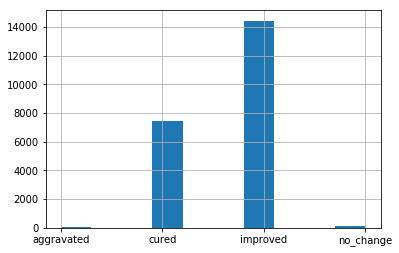

In [81]:
# Distribution of outcome
quality_fu_cases['tmt_how_disease_progressing'].hist()
quality_fu_cases['tmt_how_disease_progressing'].value_counts(dropna=False)

##### Distribution of disease

In [89]:
# Disease distribution

quality_fu_cases[['tmt_treat_for_diarrhea',
                 'tmt_treat_for_malaria',
                 'tmt_treat_for_ari']] = quality_fu_cases[['tmt_treat_for_diarrhea',
                 'tmt_treat_for_malaria',
                 'tmt_treat_for_ari']].astype(int)
# Checking if it's ME. Looks like it isn't, some events have multiple diseases
quality_fu_cases[['tmt_treat_for_diarrhea',
                 'tmt_treat_for_malaria',
                 'tmt_treat_for_ari']].sum(axis=1).value_counts()

quality_fu_cases[['tmt_treat_for_diarrhea',
                 'tmt_treat_for_malaria',
                 'tmt_treat_for_ari']].sum()

1    19869
2     2120
3       69
dtype: int64

tmt_treat_for_diarrhea     4997
tmt_treat_for_malaria      4009
tmt_treat_for_ari         15310
dtype: int64

In [100]:
quality_fu_cases.shape

(22058, 33)

##### <font color='blue'> Remove: Invalid ages</font>

In [96]:
cleaned_cases = quality_fu_cases.copy()
cleaned_cases.shape
cleaned_cases = pd.merge(quality_fu_cases, patient, how='left', left_on='tmt_patient_id', right_on='pt_patient_id')
cleaned_cases.shape

(22058, 33)

(22058, 41)

Take out events that do not have information about age

In [105]:
cleaned_cases.shape
cleaned_cases = cleaned_cases[lambda row: row['pt_date_of_birth'].notnull()]
cleaned_cases.shape

(22058, 41)

(19499, 41)

Take out events where patient was over 5 or invalid age

In [106]:
cleaned_cases['pt_date_of_birth'] = pd.to_datetime(cleaned_cases['pt_date_of_birth'])
cleaned_cases['pt_reported'] = pd.to_datetime(cleaned_cases['pt_reported'])
cleaned_cases['age'] = cleaned_cases['pt_reported'] - cleaned_cases['pt_date_of_birth']
cleaned_cases['age'] = cleaned_cases['age'].apply(lambda x: x.days/365.0).round(2)

cleaned_cases.shape
cleaned_cases = cleaned_cases[((cleaned_cases['age'] <= 5) & (cleaned_cases['age'] >= 0))]
cleaned_cases.shape

(19499, 42)

(19485, 42)

Remove events without information about gender

In [107]:
cleaned_cases['pt_sex'].replace({'Femme': 'F', 
                            'femme': 'F',
                            'Homme': 'M',
                            'homme': 'M',
                            'Fils/Fille': 'F'}, inplace=True)

cleaned_cases.shape
cleaned_cases = cleaned_cases[cleaned_cases['pt_sex'].notnull()]
cleaned_cases.shape

(19485, 42)

(19448, 42)

Removed events before 2017

In [109]:
cleaned_cases['year_reported'] = cleaned_cases['tmt_reported'].apply(lambda x: pd.to_datetime(x).year)
cleaned_cases['year_reported'].value_counts()
cleaned_cases['year_reported'].value_counts().sum()

cleaned_cases.shape
cleaned_cases = cleaned_cases[cleaned_cases['year_reported'].isin([2017, 2018])]
cleaned_cases.shape

2017    17511
2018     1926
2016        8
2014        2
2007        1
Name: year_reported, dtype: int64

19448

(19448, 43)

(19437, 43)

In [115]:
assessment['a_refer_to_cscom']

False    38552
True     16848
Name: a_refer_to_cscom, dtype: int64

In [111]:
list(assessment.columns)

['a_case_id',
 'a_chw_id',
 'a_chw_parent_id',
 'a_patient_id',
 'a_reported',
 'a_how_child_found',
 'a_when_assessed',
 'a_when_illness_began',
 'a_acc_danger_sign_seizure',
 'a_acc_danger_sign_loss_of_consiousness',
 'a_acc_danger_sign_unable_to_drink_or_breastfeed',
 'a_acc_danger_sign_disorientation_or_confusion',
 'a_acc_danger_sign_vomits_everything',
 'a_acc_danger_sign_chest_indrawing',
 'a_acc_danger_sign_wheezing',
 'a_acc_danger_sign_bleeding_that_does_not_stop',
 'a_acc_danger_sign_lathargy',
 'a_ref_danger_sign_severe_jaundice',
 'a_ref_danger_sign_dark_colored_urine',
 'a_ref_danger_sign_child_is_sick',
 'a_ref_danger_sign_conjunctival_pallor',
 'a_ref_danger_sign_red_shakir_strip',
 'a_ref_danger_sign_not_gaining_weight',
 'a_ref_danger_sign_eodema_lower_legs',
 'a_ref_danger_sign_diarrhea_more_than_14_days',
 'a_ref_danger_sign_other_diseases_newborn',
 'a_ref_danger_sign_cough_more_than_14_days',
 'a_ref_danger_sign_blood_in_stools',
 'a_temperature',
 'a_temperature_

### Initial EDA

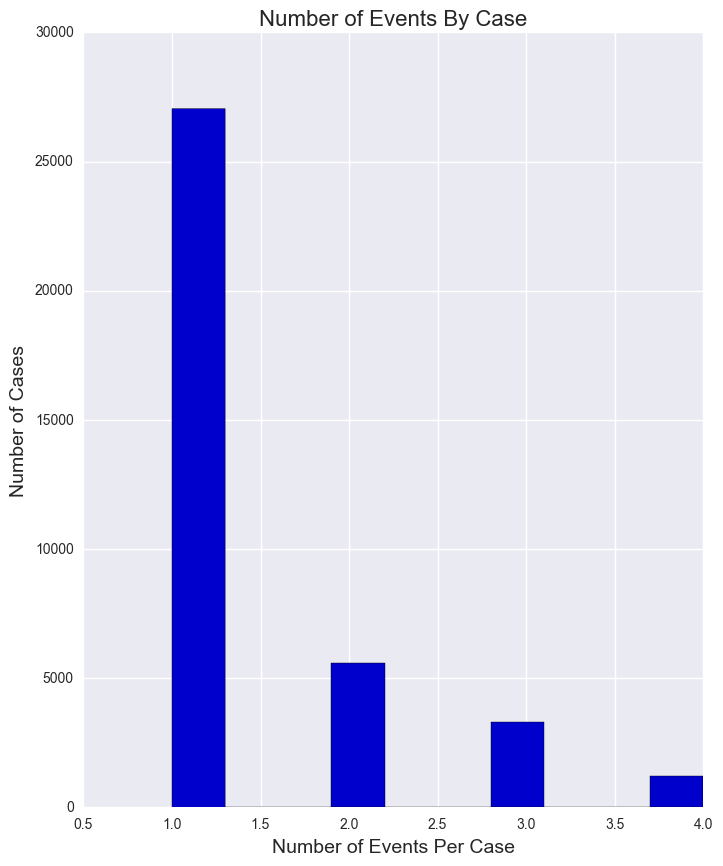

In [30]:
# case_event.groupby(['case_id'])['event_id'].count()
x = case_event['event_number'].hist(figsize=(8, 10), color='mediumblue' )
x.set_xlabel("Number of Events Per Case", fontdict={'fontsize': 14})
x.set_ylabel("Number of Cases", fontdict={'fontsize': 14})
x.set_title("Number of Events By Case", fontdict={'fontsize': 16});

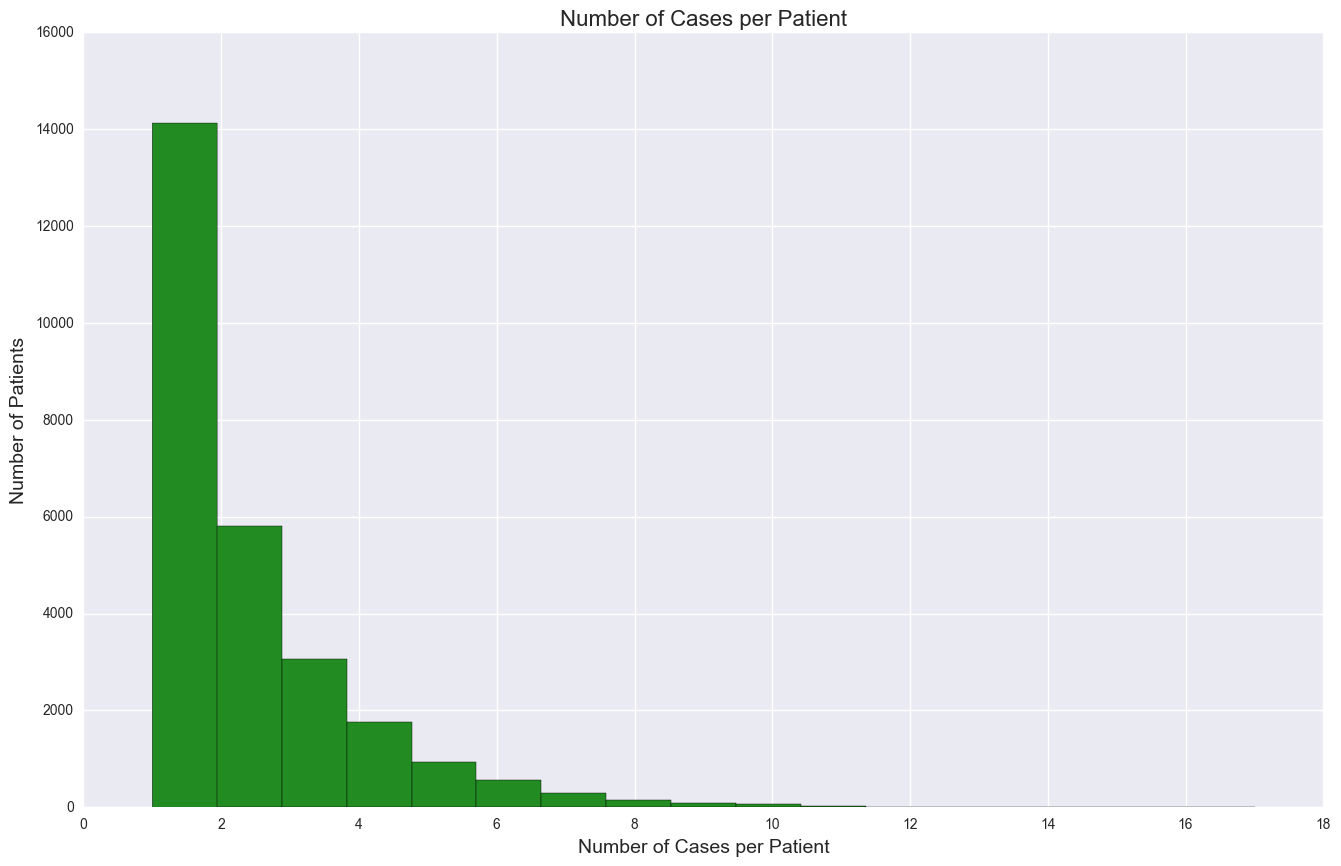

In [31]:
highest_number_of_cases = assessment.reset_index().groupby(['patient_id'])['case_id'].count().nunique()

a = (assessment
     .reset_index()
     .groupby(['patient_id'])['case_id']
     .count()
     .hist(figsize=(16, 10), 
           color='forestgreen',
           bins=highest_number_of_cases))
a.set_xlabel("Number of Cases per Patient", fontdict={'fontsize': 14})
a.set_ylabel("Number of Patients", fontdict={'fontsize': 14})
a.set_title("Number of Cases per Patient", fontdict={'fontsize': 16});

In [32]:
assessment.reset_index().groupby(['patient_id'])['case_id'].count().value_counts()

1     14127
2      5802
3      3066
4      1759
5       927
6       567
7       300
8       149
9        93
10       59
11       33
12       13
14        4
13        3
16        2
17        1
15        1
Name: case_id, dtype: int64

TypeError: cannot concatenate 'str' and 'float' objects

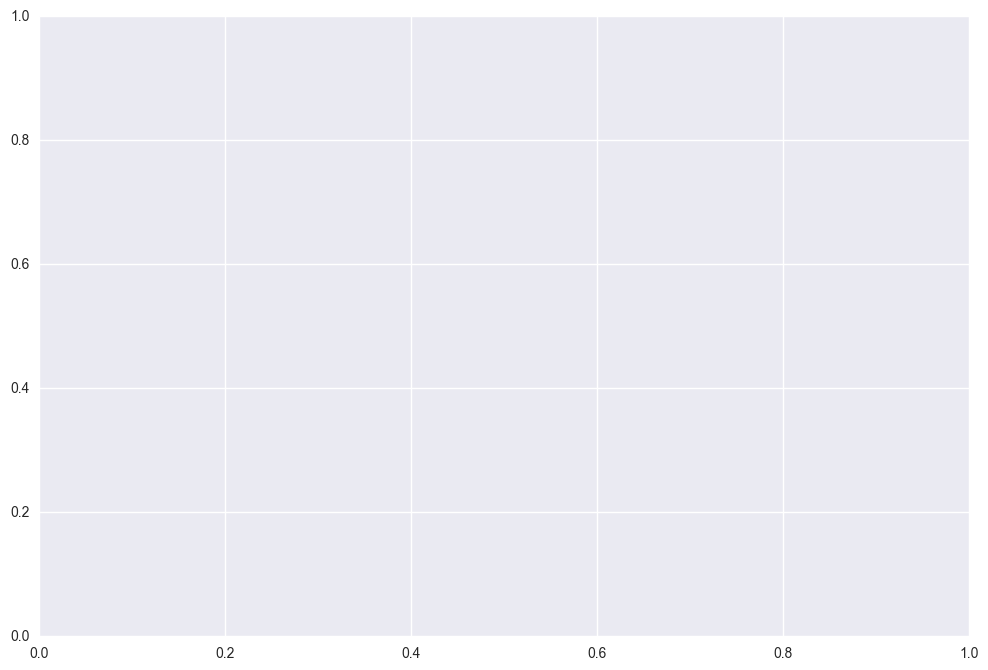

In [33]:
closed_out = treatment_fu[treatment_fu['close_out'] == True]
c = closed_out['why_close_out'].hist(figsize=(12, 8), color='orange' )
c.set_xlabel("Close-Out Reason", fontdict={'fontsize': 14})
c.set_ylabel("Number of Close-Outs", fontdict={'fontsize': 14})
c.set_title("Number of Close-Outs by Reason", fontdict={'fontsize': 16});

In [34]:
closed_out['why_close_out'].value_counts()

refusal_of_parent    286
patient_not_home     244
chw_unavailable      109
patient_died           3
Name: why_close_out, dtype: int64

In [35]:
sum(treatment_fu['close_out'] == True)

1503

### Drilldown

assessment_protocol_errors  
assessment  
case_event  
chw  
mm_raw_data  
patient_case  
patient  
treatment_fu  

#### Cleaning

In [4]:
tables_with_case_id = [assessment_protocol_errors, 
                       assessment, 
                       case_event, 
                       patient_case, 
                       treatment_fu]
for table in tables_with_case_id:
    print("\nshape:", table.shape)
    print("case_id:", len(table.index))
    print("unique case_id:", len(set(table.index)))


shape: (55404, 29)
case_id: 55404
unique case_id: 55404

shape: (55400, 65)
case_id: 55400
unique case_id: 55400

shape: (37135, 3)
case_id: 37135
unique case_id: 37135

shape: (55400, 38)
case_id: 55400
unique case_id: 55400

shape: (23561, 32)
case_id: 23561
unique case_id: 23561


In [7]:
master_cases = pd.concat([assessment_protocol_errors, assessment, patient_case], axis=1)
master_cases

ape_chw  \
00010E48-93CD-0F3B-8E76-DDA4F6A0E804  c437cf4c-d7d6-4758-b115-3285e87bd5b3   
00022FBF-A5B0-9649-861D-E5CCE1C4A427  62e87002-5fdc-41ae-b474-62baa9265e89   
000264B5-5124-9A3E-9038-EADF76D3DFA5  c27a0584-b106-469e-b0b7-538b72fd1bb4   
0004222F-9D90-36F5-9497-0A376ACCDB40  16259fcc-d057-4874-8638-2f89d3ff2f20   
000544E1-8A89-1A96-8C34-5A1A33B9220D      fda753c1c37ef32fba0138a4c7c0b6b4   
00057C45-D2AA-4607-A517-EADCE92FF7AE  706cafa2-15a9-4839-b4df-c8f8b9f25ba0   
0008205B-2209-3A09-8DEC-1F3D75ED422D  8ed49086-5878-4513-ad15-6b873cfd7dc7   
00088C18-97C0-4BC1-BF5D-E55B14759CC4  ef59aeb1-0fec-41bd-88cb-8cf9216d405a   
000AF342-B80B-C28F-AFC9-9DAECA5F2096  840b2728-463b-4ff0-983e-f0d24af1d87e   
000B506E-E535-15BD-941A-BB28A606BAEF  de636a1f-20cb-4ef7-9c9d-40b3676898db   
000BC762-4156-4A40-BEBE-4F5B587C741A      3f0fce86e571a1275c338749fb1bc987   
000EAAC7-1A25-698A-BA2C-1A194FA6FB40  71e245a4-6170-481c-aacb-440a7d17fa43   
000EF7D0-A20E-E8B5-8402-A15F870AC784  aa3410b4-3327-4fe0-9d61-7a57bd13c3a6   
000FAB64-4135-B0B0-B5F7-367D1FDB659B      db91e797f2ce030419456e90ab79438d   
000FF6D0-7E2F-7013-9796-7B8236A26F08  1fd03a0b-291b-4f37-a98e-d97bcf7d7358   
0010730C-2D63-417F-9EDD-3FB300EFC26D  ef59aeb1-0fec-41bd-88cb-8cf9216d405a   
0010B4F1-0F2A-A7C0-AF94-5EE4EEA6A3CA  ef59aeb1-0fec-41bd-88cb-8cf9216d405a   
001107E1-E5A0-554F-970A-13E5FD960D6B  e3d4114a-23dc-4f60-a70f-77d6f4c958b0   
0012FE27-75A2-0EEB-8F21-7D91E4143EB9  407f204b-4949-45d4-857b-11bfa1862870   
0013837A-611A-A4C8-9C1A-2C809A035AFC  16259fcc-d057-4874-8638-2f89d3ff2f20   
00159146-3099-3ECF-9218-DAF176D00A12      db91e797f2ce030419456e90ab7914d5   
001A1C46-8432-490E-A000-EC470966A47C  6d8fbc9e-8165-49fd-91b7-87ab10d847c9   
001A7641-6053-DD1B-8182-BF4C1A9FEE2F  a1125214-75a0-49f5-80a3-b7f9b204c0eb   
001BFB4D-FBCA-E2B7-AA28-BDE95441BED8  de9802d4-8f38-447b-ae5a-bfd7aa51712b   
001D87E6-1953-CBB5-A6E8-62483535C095  d392db7c-5640-43af-9547-9b8f38f4f550   
001EACC5-E790-5B43-A572-5E0E07D3E2C8      db91e797f2ce030419456e90ab7ad878   
001F2A7F-D998-2966-A16D-4CA87C55495D  986b83e0-4224-4ae3-a24e-2ebdd90469b9   
001F9F88-1793-3401-84D8-E34D25A43002  e4fe5803-e31a-4304-ab1f-e66b653d5ed0   
0020EC30-C539-9F2A-A952-F6832D3EC7E2  e143d2f5-cfe1-4c6c-894a-f425171c76be   
0022F015-2367-41F4-84AF-1DD1BFCD32C2  75f106b1-ad2d-4cf3-b040-6806fb38ceb1   
00249697-479E-93E4-AFFE-47F095816F20  a742fff1-7ba4-43bb-9ab1-ec602781f6c9   
0024E11F-8FB7-B43D-BA87-975EFCFD4B00  06c3ed64-e6d0-49fb-9c50-e360eb048583   
00258E41-3716-A506-8637-6C3147348485      db91e797f2ce030419456e90ab776d54   
00281338-DEBB-2F1F-BDFD-657B7AF68E7E  505a3854-ba88-4e6c-83e0-7cccc570d245   
002AEEF9-7FE0-6520-91B5-9A13B79228D2  570ea8dc-141d-48a9-99fb-02f923f15a7a   
002DE435-38C0-5E60-9115-C69C444DF80E  6739d693-a43b-410f-bd24-d34eb36ac42c   
0031016A-60F9-20F1-9379-AAB550C106FE  4a38375c-a83a-405a-9074-23a32ae15c6a   
0034352C-FF7D-10BC-85A4-11D45C2A6671  4a38375c-a83a-405a-9074-23a32ae15c6a   
00343FA2-7E37-49D3-ACA3-FB1896709A7D  d1611082-dd43-49ae-946a-cce99b07f546   
003A0DA5-480B-B58A-9A71-9F48717FBF4C  d98ac074-6601-4e35-bf98-157844325c73   
003A30E5-5667-2DE1-9EF6-3FAA71311808  50d49b4c-6cc2-4235-8483-c3d6c320ce5d   
003A6079-E918-7798-9F65-1CDFCDD9073E  3be19c44-e84f-46ee-ae0d-9470e3498825   
003A9DF8-67AF-4054-8DE6-9D2163304969      fda753c1c37ef32fba0138a4c7858d30   
003E1101-F538-22C6-A5F1-AF8CF4CD9AAE      db91e797f2ce030419456e90ab78ca79   
003ECC12-E31A-787E-8C84-125C88C154AD  fe1de9e0-2a34-44bb-96e0-b1d559d4eb00   
00405E01-AF44-C1EF-86DD-7902B10BDEC3  6d7ab543-72ba-4814-8904-1fdcd215d119   
00415D96-A612-A7D0-8AD9-ED9B3AE329E7  8dd712b6-a0ca-4474-8c70-37076d02dab2   
0041B58A-468A-D258-94AD-B1B4612C28C1  16721dab-bb85-4643-866d-2b6a9b675b67   
0042B8DB-1A4D-66E5-8724-98E36E750948  d775ec77-dd30-4603-909c-e9819fe1998a   
0044086A-F6BA-F1CC-AD5D-CC5BE2CFA369  ce4f77e4-a86d-42f1-a7e7-fc7bd8ad2227   
00441E0B-CE09-509D-803D-8C733CA25DE2  1c2246ca-2e74-4e13-805a-96568c56cf18   
00444F53-D7

In [8]:
master_events = pd.concat([case_event, treatment_fu], axis=1)
master_events

ce_case_id  \
00000C2C-724B-E657-AAFF-C9E08DC3B19E  C7C51A7D-523D-093D-B906-D9E4FDB37BDC   
00008FAD-74C4-6080-BAE2-CF1118D1F49C  54DFF209-5A24-0F25-AA91-26AD611BB2CE   
0003243F-9150-0FEF-A201-482DA14C0711  C3C76F6A-4D9B-7E1B-8DA8-58FA4BA28542   
000354A1-4ABE-2408-95FC-8BD6BB9C47A1  AC44797D-BC62-B930-BE8A-24B28CF1A33E   
0005BDE0-3195-4D73-88BD-B1A4E572F224  8C922DE2-DCEC-1509-8696-540021FC63E2   
0006DE8C-0FF1-0D88-B978-9B0975A052B3  1D8848D3-607D-B5DF-A50E-40589762DD98   
0009B33C-39F5-C3C8-9140-60D4CD2B71EA  54F292C4-69DB-6366-9BC2-72DD06C44D8E   
000A8E9D-235F-B0E7-9644-F2D2380DE5A1  3D7D3301-1B9E-B068-BA1A-2D02A8FC9A18   
000DCDAA-25FD-76F1-AC23-E673FA30823F  BC727EA8-BD97-27E1-91EA-8365977B2729   
001B50DB-33DF-3B82-8AC8-CF8E85BDA51E  0FB12310-A441-B0BA-8128-A336B621EAD3   
00220BA5-9A75-1BBD-9DC5-71CB0215E2E2  902FC104-799E-CA15-850A-F2D4376EE2FF   
00231578-F449-0C21-8401-DA5A73FD9DD3  4618501E-82F3-9233-BDCA-63CDE1A5AF51   
00271F1B-FC69-BD9E-A48D-B042FF6299C0  EA83D7D9-2BDF-BE75-B1AF-C92C642C9F3C   
00282600-95BD-5BAA-8D02-AE40E421061D  D628162E-950B-3584-83C8-75B7B7ABC42D   
002BCFDD-078A-5484-B95F-B9C7D7E1D139  7C5BF7DD-2D5A-8CD4-8315-B83EE06C605D   
0032CEEE-2C49-8DEB-A825-7F067089DB05  1F42A25E-87A8-59E1-890B-18A5E96FB937   
0035323F-5104-3318-ACFC-F763F3F33B8B  794321D7-A383-F736-B2AA-5A9B344B4BA0   
0035C640-631B-C7B6-B360-BB7BC9A9C51E  5CE143B5-2D02-3CB6-8DAA-F3E3A19FE8D0   
00380C3F-7707-284F-BF89-379F9D554C85  FF171D7A-6998-2B9B-BFB7-00ACC6726438   
0038CBB7-CD68-5423-A90A-D3E49198ED0B  B3DA3A5C-C85E-12E9-934B-535C348A6587   
00396E6A-BF1D-944C-961C-19A482FC5D1E  99C0D2B0-D50E-A24A-A360-4DE7052AB471   
003AAD0A-E6BB-6B58-AFEA-51E5F69E0C9A  AD253C4D-5667-E721-90DA-30613506FAB0   
003ADA17-5CBE-1B12-A973-CC5953AA88F6  8D84BDE0-C426-EEB7-BD4B-DEBE26228287   
003B477E-C174-B18B-AA85-113397AF3197  A84DD47D-A4A0-A006-B847-FC520A144742   
003C09C0-6E2F-6524-86A9-9F3A216A7FD4  589A07A4-124E-8CA8-AD2F-A11267D68695   
003E065D-FEE8-199B-8597-A8C6683664BE  F7CDF400-BAEE-C0A9-AAA6-67B666B2E33F   
003E3AE5-8834-2AC9-8A28-3CE814DEF5FB  3CFB24D8-880A-541F-9ADD-FB4A533BCCB8   
003E4127-0005-9B65-AB4B-EC2E88B3C1C8  35F5F89B-BE8E-4289-BFA1-8A9A12C78AAC   
003E805A-467D-0B8D-902E-9BC4845A2EA9  870FA1F7-6351-9CE1-8B24-9EF80325D91A   
003F8E43-1600-F78F-AA05-3A562D3CE8B0  DF6F0398-95ED-D721-A25B-F346F65C42DD   
00401EC8-A5B4-AEAE-805E-F4C2C7C13263  C06AE337-ACD8-46FD-AF1B-A162E590F3AB   
00404DB2-1BB9-06B4-9373-F7C2269F0805  7D78D772-0488-E558-ADFB-FED75094C2BC   
0040721A-9525-81D6-8860-130CE3C384B3  7E1214F1-F509-E953-9B92-E22125481576   
00409357-7318-D211-B60A-02161E5CDF01  4D378EB4-07AB-8EEE-A975-5A54FC64986F   
0041CEA9-F5A3-206D-AFA5-4BAAE3F75BAA  0A04FED2-941C-8C6F-889C-A4EB05A113EF   
0046A1FD-5CD5-9669-B0AB-0FE08B57EE51  D83D6ECB-30B8-D8D9-8B64-28C7490FF683   
0049C699-32BD-3647-AF19-0C56B16BD33C  6A9DD586-12F3-2ADD-A37E-B1502A939AD8   
004C8E4B-BC0E-1370-803F-E826EA3B44FB  D565700E-48A9-9D7E-A5DC-EC01F6F0963D   
004F63DD-9B2F-24C1-95F8-D414B32255E8  24BF0E43-6639-22F0-AA17-14E9A869486B   
00511EF8-E57F-717A-8A50-2319973D2B07  30B58D03-3A5E-2CD0-9C69-7A5540AD293E   
00558B9C-86AE-C649-9BA4-3A9E671B710D  7D3A5533-8CE7-B4B6-89A9-7A8F684515A3   
0055902F-FA52-BB60-9230-03BBA936862D  05B71AD9-52F3-9392-8788-F424020AC0A2   
00571921-0D1E-7BA8-A3A7-2ED22653B927  62092390-AAF2-FA2F-998B-2EEC3759D166   
0058891F-E594-57FF-A34E-4843EC9A8686  5B016D1A-FDFE-849F-876C-6AD113F7D95D   
005B75C7-ABB4-44C5-B5F1-8EA8362A3141  43CC635B-E024-4FA9-8D79-B5A6A2FCC71E   
005BFA52-29DB-5FD5-A199-2B6956965CEB  05ED40C5-E3EC-3DC0-A295-030C1C3BF489   
005F7363-D8CC-85A7-9EA4-0FA4AF0FE259  20CE5806-4E11-B6B8-A2BF-E4EC09EA41CE   
005F8C97-3290-3629-8664-4C6920F140AA  2294042F-1C9B-0A92-939E-0FDE455183B4   
00603111-A16A-194A-921F-AFBC2A3C458C  A62B46B0-F00B-1508-BDED-F0B19E08F220   
006414EF-028C-5116-B0DB-878134F5EFDC  4FDAA955-595F-B4DD-9650-28776AD08115   
006574FE-53FD-6812-BFCD-48D4E26F75D4  0B1A8839-EBF0-8368-8F9C-99057FEF5C5C   
0066BC6E

##### Year

In [11]:
55404 - 54093

1311

In [9]:
master_cases['year_reported'] = master_cases['ape_reported'].apply(lambda x: pd.to_datetime(x).year)
master_cases['year_reported'].value_counts()
master_cases['year_reported'].value_counts().sum()

master_cases.shape
master_cases = master_cases[master_cases['year_reported'].isin([2017, 2018])]
master_cases.shape

2017    47181
2018     7912
2014      175
2010       93
2016       22
2015        5
2013        5
2007        4
2009        3
1970        3
2008        1
Name: year_reported, dtype: int64

55404

(55404, 133)

(55093, 133)

##### Closed out cases

In [12]:
# Removing closed out cases, where value is True.
close_out = master_events[master_events['tmt_close_out'] == 1]
close_out_with_reason = master_events[master_events['tmt_why_close_out'].notnull()]

# CHECK: Confirming that everyone with a close out reason is marked as True under the close out column
assert set(close_out_with_reason.index).issubset(set(close_out.index))

master_events.shape
master_events = master_events[~master_events.index.isin(list(close_out.index))]
master_events.shape

(37135, 35)

(35632, 35)

In [13]:
37135 - 35632

1503

##### Follow up only table

In [14]:
master_events[['tmt_event_number', 'ce_event_number']]

tmt_event_number  ce_event_number
00000C2C-724B-E657-AAFF-C9E08DC3B19E               2.0                2
00008FAD-74C4-6080-BAE2-CF1118D1F49C               2.0                2
0003243F-9150-0FEF-A201-482DA14C0711               1.0                1
000354A1-4ABE-2408-95FC-8BD6BB9C47A1               2.0                2
0005BDE0-3195-4D73-88BD-B1A4E572F224               2.0                2
0006DE8C-0FF1-0D88-B978-9B0975A052B3               3.0                3
0009B33C-39F5-C3C8-9140-60D4CD2B71EA               1.0                1
000A8E9D-235F-B0E7-9644-F2D2380DE5A1               1.0                1
000DCDAA-25FD-76F1-AC23-E673FA30823F               NaN                1
001B50DB-33DF-3B82-8AC8-CF8E85BDA51E               1.0                1
00231578-F449-0C21-8401-DA5A73FD9DD3               NaN                1
00271F1B-FC69-BD9E-A48D-B042FF6299C0               NaN                1
00282600-95BD-5BAA-8D02-AE40E421061D               NaN                1
002BCFDD-078A-5484-B95F-B9C7D7E1D139               3.0                3
0032CEEE-2C49-8DEB-A825-7F067089DB05               1.0                1
0035323F-5104-3318-ACFC-F763F3F33B8B               2.0                2
0035C640-631B-C7B6-B360-BB7BC9A9C51E               2.0                2
00380C3F-7707-284F-BF89-379F9D554C85               2.0                2
0038CBB7-CD68-5423-A90A-D3E49198ED0B               NaN                1
00396E6A-BF1D-944C-961C-19A482FC5D1E               1.0                1
003AAD0A-E6BB-6B58-AFEA-51E5F69E0C9A               3.0                3
003ADA17-5CBE-1B12-A973-CC5953AA88F6               2.0                2
003B477E-C174-B18B-AA85-113397AF3197               1.0                1
003C09C0-6E2F-6524-86A9-9F3A216A7FD4               NaN                1
003E065D-FEE8-199B-8597-A8C6683664BE               1.0                1
003E3AE5-8834-2AC9-8A28-3CE814DEF5FB               NaN                1
003E4127-0005-9B65-AB4B-EC2E88B3C1C8               1.0                1
003E805A-467D-0B8D-902E-9BC4845A2EA9               NaN                1
003F8E43-1600-F78F-AA05-3A562D3CE8B0               NaN                1
00401EC8-A5B4-AEAE-805E-F4C2C7C13263               1.0                1
0040721A-9525-81D6-8860-130CE3C384B3               NaN                1
00409357-7318-D211-B60A-02161E5CDF01               1.0                1
0046A1FD-5CD5-9669-B0AB-0FE08B57EE51               NaN                1
004C8E4B-BC0E-1370-803F-E826EA3B44FB               4.0                4
004F63DD-9B2F-24C1-95F8-D414B32255E8               1.0                1
00511EF8-E57F-717A-8A50-2319973D2B07               1.0                1
00558B9C-86AE-C649-9BA4-3A9E671B710D               NaN                1
0055902F-FA52-BB60-9230-03BBA936862D               1.0                1
00571921-0D1E-7BA8-A3A7-2ED22653B927               2.0                2
005B75C7-ABB4-44C5-B5F1-8EA8362A3141               NaN                1
005BFA52-29DB-5FD5-A199-2B6956965CEB               NaN                1
005F7363-D8CC-85A7-9EA4-0FA4AF0FE259               2.0                2
005F8C97-3290-3629-8664-4C6920F140AA               NaN                1
00603111-A16A-194A-921F-AFBC2A3C458C               4.0                4
006414EF-028C-5116-B0DB-878134F5EFDC               3.0                3
006574FE-53FD-6812-BFCD-48D4E26F75D4               1.0                1
0066BC6E-4B7E-8343-98A8-EFBBCEA576CE               NaN                1
006A0EE7-E305-D34F-9CA3-6296C3FC292F               NaN                1
006A2B5D-3363-C299-B0C9-735010F4BEAD               NaN                1
006AB303-0834-E49D-BA48-9D99EDDE8CC4               3.0                3
006B2C5D-00A2-D201-9E23-30C5F0204713               1.0                1
006EF08A-C952-E0EF-A163-2FDF0397162A               1.0                1
006F18E0-BAEA-DBA9-BEC6-4D76FBEB9A01               NaN                1
00722C47-E38A-9ADE-869B-AFB5C751D901               1.0                1
0077DEE8-C0DC-47D0-92A7-C8F25872C24D               NaN                1
007918

In [15]:
# Creating a separate table of just the events that overlap with the events in the treatment fu table
follow_up_only = master_events[master_events['tmt_event_number'] == master_events['ce_event_number']]
follow_up_only['ce_event_number'].value_counts()
follow_up_only.shape

1    12162
2     5458
3     3242
4     1196
Name: ce_event_number, dtype: int64

(22058, 35)

In [29]:
5458 + 3242 + 1196

9896

In [21]:
second_event = follow_up_only[lambda x: x['tmt_event_number'] == 2]
second_event['ce_case_id'].nunique()

5458

In [19]:
master_cases = master_cases.reset_index().rename(columns={'index': 'ape_case_id'})
master_events = master_events.reset_index().rename(columns={'index': 'ce_event_id'})

#### Analysis Variables

In [4]:
all_info = pd.merge(master_cases, master_events, left_on='ape_case_id', right_on='ce_case_id', how='left')
all_info[['ape_case_id', 'ce_case_id']]

NameError: name 'master_cases' is not defined

In [ ]:
# Only looking into data where case ID is populated
all_info.shape
all_info = all_info[all_info['ape_case_id'].notnull()]
all_info.shape

In [5]:
all_info = pd.merge(all_info, patient, left_on='ptcase_patient_id', right_on='pt_patient_id', how='left')
all_info.shape

NameError: name 'all_info' is not defined

In [18]:
list(all_info.columns)

['ape_case_id',
 'ape_chw',
 'ape_chw_area',
 'ape_formname',
 'ape_has_protocol_errors',
 'ape_number_of_protocol_errors',
 'ape_act_based_combination_without_positive_tdr',
 'ape_acute_respiratory_infection_without_24h_follow_up',
 'ape_acute_respiratory_infection_without_48h_follow_up',
 'ape_acute_respiratory_infection_without_5_day_follow_up',
 'ape_amoxicillin_without_pneumonia',
 'ape_danger_signs_without_referral',
 'ape_diarrhea_without_5day_follow_up',
 'ape_diarrhea_without_ors',
 'ape_diarrhea_without_zinc',
 'ape_fever_without_tdr',
 'ape_incorrect_dosage_of_act_based_combination',
 'ape_incorrect_dosage_of_albendazole',
 'ape_incorrect_dosage_of_amoxicillin',
 'ape_incorrect_dosage_of_paracetamol',
 'ape_incorrect_dosage_of_vitamin_a',
 'ape_incorrect_dosage_of_zinc',
 'ape_malaria_without_24h_follow_up',
 'ape_malaria_without_48h_follow_up',
 'ape_malaria_without_72h_follow_up',
 'ape_muac_yellow_no_malnutrition_follow_up',
 'ape_pneumonia_without_amoxicillin',
 'ape_sev

In [19]:
all_info = all_info[all_info['pt_date_of_birth'].notnull()]

In [20]:
all_info['pt_date_of_birth'] = pd.to_datetime(all_info['pt_date_of_birth'])
all_info['a_reported'] = pd.to_datetime(all_info['a_reported'])
all_info['Age'] = all_info['a_reported'] - all_info['pt_date_of_birth']
all_info['Age'] = all_info['Age'].apply(lambda x: x.days/365.0).round(2)

In [21]:
all_info.shape
all_info = all_info[((all_info['Age'] <= 5) & (all_info['Age'] >= 0))]
all_info.shape

(56188, 179)

(55911, 179)

In [7]:
list(treatment_fu.columns)

['case_id',
 'event_number',
 'chw_id',
 'chw_parent_id',
 'patient_id',
 'reported',
 'task_to_perform',
 'treat_for_diarrhea',
 'treat_for_malaria',
 'treat_for_ari',
 'under_observation',
 'child_temperature',
 'child_temperature_retake',
 'respiration_rate',
 'child_taking_act',
 'child_morning_act',
 'child_evening_act',
 'act_not_given',
 'child_taking_amox',
 'amox_not_given',
 'child_taking_zinc',
 'zinc_not_given',
 'child_taking_ors',
 'ors_not_given',
 'how_disease_progressing',
 'new_danger_sign',
 'close_out',
 'why_close_out',
 'when_child_died',
 'where_child_died',
 'follow_up_count',
 'follow_up_type']

In [8]:
assessment_protocol_errors

chw  \
assessment_uuid                                                              
933F71FF-432A-3375-959C-A2D911DFDB4F  57ecf7ed-342c-4f16-8c67-cab063be9f6a   
BDB4A7B6-F0A3-C95F-947C-E61A64E6AB68  a1125214-75a0-49f5-80a3-b7f9b204c0eb   
E3741EA5-F4F9-C454-820B-60730FADD957  909f8f9d-f636-463f-b6c6-07c8c561e63c   
EE193BF5-B0F2-2C20-B207-BF130EF6BC5C  ed5e6b74-f725-4e67-8037-8db50a5a56e3   
1B56A715-823A-B637-A702-DC7988633406  40713116-fd23-4ba2-8a0f-825a539050f1   
A09B3170-8D49-0BE7-80DD-F46F28FF5F89  d7ead06b-fbf9-44a6-abb9-d6d544d3a972   
B740F64D-BD97-4853-82EC-96D2592A7E63      fda753c1c37ef32fba0138a4c7c1224b   
0A67A3B5-2EFB-6253-89D4-3CC176529D57  16259fcc-d057-4874-8638-2f89d3ff2f20   
F50FCE60-B52F-BD19-9064-6BA158231DC0  cebc5a8b-c659-4d72-bb56-184113c420c0   
86A1D7DA-D937-56D9-BB49-A33C33EC040B  ef59aeb1-0fec-41bd-88cb-8cf9216d405a   
A73FD4D3-A0A7-BD24-8482-E873777AA929  9d88d8aa-3f2e-4d33-ad1c-1c7a03c8a30e   
25048338-2430-132B-ADA9-F388BAB9B3EA  c8bddef4-d7d5-4896-9e9f-4caf59ed2dd1   
B3532B04-8A7F-FE45-BA73-FA1D9E2342AF  c437cf4c-d7d6-4758-b115-3285e87bd5b3   
9C419944-9893-1CD0-826B-369021440129  ed5e6b74-f725-4e67-8037-8db50a5a56e3   
F62CA1DD-32BD-CAA0-A363-708B47B23263  518eca12-50ab-4eee-be07-6bd7c8b3608d   
979A46EF-6D39-6D53-91D2-61150B2A082A  4987d9a0-2574-4b17-8220-d5e01e285e0d   
2CD307E4-1A0E-EF01-B4F2-DE9049E510CC  ff2d6e94-44e3-43ff-83d6-ecc561966cb0   
532EE720-F589-8C31-A210-71FE87891184  4987d9a0-2574-4b17-8220-d5e01e285e0d   
8D8EC9BE-9006-0A5D-85B5-5A8B8C52B9B9  b87d1fcf-898c-4d80-9824-7da53f00a3ae   
5185995C-9BD3-B64A-8593-D1CED77C4946      a398efbec9a12330f4f48fe6c6515801   
07E25282-6D87-4ACF-BBC8-B4368EACD8D9  0aed8ef0-22d6-4730-8d82-a474c9ed8f29   
2DB88E35-4431-1F6A-9A22-51273D19D2B0  aac1a13d-067a-496d-a343-d63d58025236   
1800C639-7170-9477-81B9-B725F7889E94  fe1de9e0-2a34-44bb-96e0-b1d559d4eb00   
F3A1002B-DEFB-C331-AB73-8B9F039F52FA      fda753c1c37ef32fba0138a4c7c1c250   
3A177AF2-66A4-61C5-9AC7-24175C316441  aa3410b4-3327-4fe0-9d61-7a57bd13c3a6   
79CBD600-58E4-AF65-91DF-BB3FBAD778D3  ab28ea46-7853-4f3e-9ab7-cc74ebfe7008   
F12E05B4-BFA6-E75A-B6FC-96883AD3292C  e143d2f5-cfe1-4c6c-894a-f425171c76be   
775B74C8-9FFC-FED8-97B2-E209EEEED50A      3f0fce86e571a1275c338749fb1c6688   
B40C58C0-AFAD-19DB-8FDD-70FF4BD9FE58  40713116-fd23-4ba2-8a0f-825a539050f1   
7585D6E2-8B3F-3F1C-9D23-3E23D984E9EA  a74e5538-2294-467a-8906-0826353c3091   
3C5CBC0C-40A4-5A1F-B822-9E310B05E25E      fda753c1c37ef32fba0138a4c7c33958   
62B5A1CB-BCC1-021D-A3E8-21988E697F63  3a482517-d237-4e1f-9dc6-26fa91651575   
8A2FB437-2426-7F89-A409-19E1EE495CC6  a4119d4c-664e-49cf-a596-aa25981ebf8d   
1D143F25-9A8F-AB00-8B9A-89CBFA3E2D53  cc63af28-d0ea-49a7-9169-da49ee8e95a3   
78BE8151-90AF-988F-8936-504FDE9622FB  c437cf4c-d7d6-4758-b115-3285e87bd5b3   
1E222186-5EF9-F7B1-A837-A1909431111D  d2cadefc-7f02-4f74-b57b-d58449de504e   
DFA0B7FF-90E4-CF33-A7C5-75CE9F80D7A9      fda753c1c37ef32fba0138a4c7c165dd   
4A24A8DA-9A38-212F-85BE-CC420FB5875E  28469b00-90b5-46d2-80f3-c5ec043597db   
21C006B4-B586-ED12-9F47-2C71C63C69BC  40713116-fd23-4ba2-8a0f-825a539050f1   
0E503239-0103-AAB4-93A4-14AFD79C5288  05a6e9c8-a1e5-4087-81d0-dc8773fd9a53   
52145B5B-F835-6506-9DCF-E39C28074AAA      fda753c1c37ef32fba0138a4c7c1224b   
CB38B1F5-BF66-B1DC-A4C8-6705A01C46B4  75f106b1-ad2d-4cf3-b040-6806fb38ceb1   
03816E94-B80D-A135-AF53-422F9D07075D  75f106b1-ad2d-4cf3-b040-6806fb38ceb1   
15E8C82E-27B8-B4F6-BB4F-C2BEB5705BFC  8ffd9068-f388-42c2-a2df-55dc4dd74293   
FBBF1FB3-C39A-34B1-A618-D176B0CC0530  4ad43fd0-107c-4f32-916b-0dec59300de6   
248606E3-D435-AA02-915F-DBF76ED2322F  06c3ed64-e6d0-49fb-9c50-e360eb048583   
E68AC6AF-1A0E-65A4-8B18-ECFBC4A2CF8B  8e7fd007-ce60-4725-a149-2c4a1e64bb04   
BE43B2F1-8426-3A93-89CE-E93C5F8BA06C  cfd40615-aea3-4663-84bb-71779218165e   
AFBD8C0A-0EDA-B81E-ACC0-40E066BF8EC9  40713116-fd23-4ba2-8a0f-825a539050f1   
FCA5802B-503A-D0F1-BE73-392376A57A63      36bbde76d9ed4f26c633d5c9600e16a8   
36CAA50D-348D-9

In [49]:
56188 - 55911

277

In [22]:
all_info['pt_sex'].replace({'Femme': 'F', 
                            'femme': 'F',
                            'Homme': 'M',
                            'homme': 'M',
                            'Fils/Fille': 'F'}, inplace=True)

In [23]:
all_info['pt_sex'].value_counts(dropna=False)

M      28848
F      27002
NaN       61
Name: pt_sex, dtype: int64

In [24]:
all_info = all_info[all_info['pt_sex'].notnull()]

##### identifiers

In [25]:
diarrhea_cols = [col for col in all_info.columns if 'diarr' in col]
malaria_cols = [col for col in all_info.columns if 'malaria' in col]
pneumonia_cols = [col for col in all_info.columns if 'pneum' in col]
malnutrition_cols = [col for col in all_info.columns if 'nutr' in col]
fever_cols = [col for col in all_info.columns if 'fever' in col or 'temp' in col]

diarrhea_cols
malaria_cols
pneumonia_cols
malnutrition_cols
fever_cols

['ape_diarrhea_without_5day_follow_up',
 'ape_diarrhea_without_ors',
 'ape_diarrhea_without_zinc',
 'ape_severe_diarrhea_without_referral',
 'a_ref_danger_sign_diarrhea_more_than_14_days',
 'a_treat_diarrhea',
 'a_diarrhea_did_you_give_zinc',
 'a_diarrhea_zinc_dosage',
 'a_diarrhea_why_not_give_zinc',
 'a_diarrhea_why_not_give_zinc_other',
 'a_diarrhea_did_you_give_ors',
 'a_diarrhea_why_not_give_ors',
 'a_diarrhea_why_not_give_ors_other',
 'ptcase_treat_diarrhea',
 'ptcase_diarrhea_without_5day_follow_up',
 'ptcase_diarrhea_without_ors',
 'ptcase_diarrhea_without_zinc',
 'ptcase_severe_diarrhea_without_referral',
 'tmt_treat_for_diarrhea']

['ape_malaria_without_24h_follow_up',
 'ape_malaria_without_48h_follow_up',
 'ape_malaria_without_72h_follow_up',
 'ape_symptoms_of_malaria_without_tdr',
 'a_malaria_tdr_not_done',
 'a_treat_malaria',
 'a_malaria_give_act',
 'a_malaria_act_dosage',
 'a_malaria_not_give_act',
 'ptcase_treat_malaria',
 'ptcase_malaria_without_24h_follow_up',
 'ptcase_malaria_without_48h_follow_up',
 'ptcase_malaria_without_72h_follow_up',
 'ptcase_symptoms_of_malaria_without_tdr',
 'tmt_treat_for_malaria']

['ape_amoxicillin_without_pneumonia',
 'ape_pneumonia_without_amoxicillin',
 'ptcase_amoxicillin_without_pneumonia',
 'ptcase_pneumonia_without_amoxicillin']

['ape_muac_yellow_no_malnutrition_follow_up',
 'a_nutri_color_shakir',
 'ptcase_muac_yellow_no_malnutrition_follow_up']

['ape_fever_without_tdr',
 'a_temperature',
 'a_temperature_retake',
 'a_notion_of_fever',
 'ptcase_fever_without_tdr',
 'tmt_child_temperature',
 'tmt_child_temperature_retake']

In [26]:
diarrhea_cols = ['a_ref_danger_sign_diarrhea_more_than_14_days',
                 'a_treat_diarrhea',
                 'a_diarrhea_did_you_give_zinc',
                 'a_diarrhea_zinc_dosage',
                 'a_diarrhea_why_not_give_zinc',
                 'a_diarrhea_did_you_give_ors',
                 'a_diarrhea_why_not_give_ors',
                 'ptcase_treat_diarrhea',
                 'tmt_treat_for_diarrhea']

malaria_cols = ['a_malaria_tdr_not_done',
                 'a_treat_malaria',
                 'a_malaria_give_act',
                 'a_malaria_act_dosage',
                 'a_malaria_not_give_act',
                 'ptcase_treat_malaria',
                'tmt_treat_for_malaria']

pneumonia_cols = ['ptcase_pneumonia_without_amoxicillin']

malnutrition_cols = ['a_nutri_color_shakir']

fever_cols = ['a_notion_of_fever']

In [28]:
for col in fever_cols:
    print(col)
    all_info[col].value_counts(dropna=False)

a_notion_of_fever


yes    22496
no     17763
NaN    15591
Name: a_notion_of_fever, dtype: int64

In [29]:
# Cleaning up column values
all_info['a_ref_danger_sign_diarrhea_more_than_14_days'].replace('no', np.nan, inplace=True)
all_info['a_treat_diarrhea'].replace(False, np.nan, inplace=True)
all_info['ptcase_treat_diarrhea'].replace(False, np.nan, inplace=True)
all_info['tmt_treat_for_diarrhea'].replace(False, np.nan, inplace=True)

all_info['a_treat_malaria'].replace(False, np.nan, inplace=True)
all_info['a_diarrhea_did_you_give_zinc'].replace('no', np.nan, inplace=True)
all_info['ptcase_treat_malaria'].replace(False, np.nan, inplace=True)
all_info['tmt_treat_for_malaria'].replace(False, np.nan, inplace=True)

all_info['ptcase_pneumonia_without_amoxicillin'].replace(False, np.nan, inplace=True)

all_info['a_notion_of_fever'].replace('no', np.nan, inplace=True)

In [30]:
def case_type(row):
    case_type = []
    if row[diarrhea_cols].any():
        case_type.append('D')
    elif row[malaria_cols].any():
        case_type.append('M')
    elif row[pneumonia_cols[0]] == 1:
        case_type.append('P')
    elif row[malnutrition_cols[0]] == 1:
        case_type.append('N')
    elif row[fever_cols[0]] == 1:
        case_type.append('F')
    else:
        case_type = ['O']
    return case_type

all_info['Case Type'] = all_info.apply(case_type, axis=1)

KeyboardInterrupt: 

In [336]:
# all_info['Case Type'] = pd.Series()

# for i, row in all_info.iterrows():
#     case_type = []
#     if row[diarrhea_cols].any():
#             case_type.append('D')
#     elif row[malaria_cols].any():
#         case_type.append('M')
#     elif row[pneumonia_cols[0]] == 1:
#         case_type.append('P')
#     elif row[malnutrition_cols[0]] == 1:
#         case_type.append('N')
#     elif row[fever_cols[0]] == 1:
#         case_type.append('F')
#     else:
#         case_type = ['O']
#     all_info['Case Type'][i] = case_type


KeyboardInterrupt: 

##### Risk Factors

##### Compliance

##### Protocol Errors

##### Other

#### Drilldown numbers

In [31]:
# Number of patients
patient_id_columns = [col for col in all_info.columns if 'patient_id' in col]
all_info[patient_id_columns].notnull().sum()

all_info['a_patient_id'].nunique()

a_patient_id         55850
ptcase_patient_id    55850
tmt_patient_id       20790
pt_patient_id        55850
dtype: int64

20609

In [33]:
case_id_columns = [col for col in all_info.columns if 'case_id' in col]
all_info[case_id_columns].count()

for col in case_id_columns:
    print(col)
    all_info[col].nunique()

ape_case_id    55850
ce_case_id     30471
tmt_case_id    20790
dtype: int64

ape_case_id


46978

ce_case_id


21599

tmt_case_id


11918

In [35]:
# assessment = assessment.reset_index()
pts_with_assessments = pd.merge(assessment, patient, how='inner', left_on='a_patient_id', right_on='pt_patient_id')

mm_raw_data['muso_CensusID'] = mm_raw_data['muso_CensusID'].apply(str)
pts_with_assessments['pt_external_id'] = pts_with_assessments['pt_external_id'].apply(str)

overlap_w_census_ids = list(set(mm_raw_data['muso_CensusID']).intersection(set(pts_with_assessments['pt_external_id'])))
overlap_w_census = mm_raw_data[mm_raw_data['muso_CensusID'].isin(overlap_w_census_ids)]

# (overlap_w_census.count()/len(overlap_w_census)*100).sort_values(ascending=False)

In [37]:
assessment_cols = [col for col in all_info.columns if col.startswith('a_')]
for col in assessment_cols:
    if all_info[col].nunique() < 4 and all_info[col].dtype != 'bool' and all_info[col].dtype != float:
        all_info[col] = all_info[col].replace({"yes": 1, "no": np.nan})

all_info[assessment_cols].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55850 entries, 0 to 65178
Data columns (total 65 columns):
a_chw_id                                           55850 non-null object
a_chw_parent_id                                    55850 non-null object
a_patient_id                                       55850 non-null object
a_reported                                         55850 non-null datetime64[ns]
a_how_child_found                                  55850 non-null object
a_when_assessed                                    55850 non-null object
a_when_illness_began                               55850 non-null object
a_acc_danger_sign_seizure                          314 non-null float64
a_acc_danger_sign_loss_of_consiousness             67 non-null float64
a_acc_danger_sign_unable_to_drink_or_breastfeed    366 non-null float64
a_acc_danger_sign_disorientation_or_confusion      85 non-null float64
a_acc_danger_sign_vomits_everything                1066 non-null float64
a_acc_danger_

In [297]:
all_info[assessment_cols]

ape_diarrhea_without_5day_follow_up ape_diarrhea_without_ors  \
0                                   False                    False   
1                                   False                    False   
2                                   False                    False   
3                                   False                    False   
5                                   False                    False   
6                                   False                    False   
7                                   False                    False   
8                                   False                    False   
9                                   False                    False   
11                                  False                    False   
12                                  False                    False   
14                                   True                    False   
15                                  False                    False   
16                                   True                    False   
17                                  False                    False   
18                                  False                    False   
19                                   True                    False   
21                                  False                    False   
22                                  False                    False   
23                                  False                    False   
24                                  False                    False   
26                                  False                    False   
27                                  False                    False   
28                                  False                    False   
29                                  False                    False   
30                                  False                    False   
31                                  False                    False   
32                                  False                    False   
33                                  False                    False   
38                                   True                    False   
39                                  False                    False   
40                                  False                    False   
41                                  False                    False   
42                                  False                    False   
43                                  False                    False   
44                                  False                    False   
45                                  False                    False   
46                                  False                    False   
49                                  False                    False   
50                                  False                    False   
51                                   True                    False   
52                                  False                    False   
53                                  False                    False   
54                                  False                    False   
55                                  False                    False   
56                                  False                    False   
57                                  False                    False   
58                                  False                    False   
59                                  False                    False   
60                                  False                    False   
62                                  False                    False   
65                                  False                    False   
66                                  False                    False   
67                                   True                     True   
68                                  False                    False   
69                                  False                    False   
70              

In [38]:
all_info['health_outcome__poor'] = (
                                    (all_info['tmt_how_disease_progressing'].isin(['no_change', 'aggravated']))
                                    | (all_info['tmt_why_close_out'] == 'patient_died')
                                   ).astype(int)

all_info['health_outcome__death'] = (all_info['tmt_why_close_out'] == 'patient_died').astype(int)
all_info['health_outcome__cured'] = all_info['tmt_how_disease_progressing'] == 'cured'

In [39]:
non_health_indicator_cols = list(all_info[assessment_cols].count()[lambda x: x < 35000].index)
health_issues = all_info[all_info[non_health_indicator_cols].any(axis=1)]

In [40]:
health_issues['tmt_how_disease_progressing'].value_counts(dropna=False)

NaN           33426
improved      13272
cured          6731
no_change       160
aggravated       67
Name: tmt_how_disease_progressing, dtype: int64

In [41]:
health_issues['pt_external_id'] = health_issues['pt_external_id'].apply(str)
mm_raw_data['muso_CensusID'] = mm_raw_data['muso_CensusID'].apply(str)

In [42]:
overlap_w_census_ids = list(set(mm_raw_data['muso_CensusID']).intersection(set(health_issues['pt_external_id'])))
overlap_w_census = mm_raw_data[mm_raw_data['muso_CensusID'].isin(overlap_w_census_ids)]
(overlap_w_census.count()/len(overlap_w_census)*100).sort_values(ascending=False)

muso__merge             100.000000
muso_concession         100.000000
muso_village            100.000000
muso_menage             100.000000
muso_SexeFinal          100.000000
muso_CensusID           100.000000
muso_LDP                 99.887260
muso_AgeAnFinal          99.887260
muso_var124              89.515220
muso_var1188_3           89.515220
muso_var1188_99          89.515220
muso_var1188_88          89.515220
muso_var1188_7           89.515220
muso_var1188_6           89.515220
muso_var1188_5           89.515220
muso_var1188_4           89.515220
muso_var1188_2           89.515220
muso_var119              89.515220
muso_var1188_1           89.515220
muso_var117a             89.515220
muso_var116b             89.515220
muso_var123_2            89.515220
muso_var116a             89.515220
muso_var1188_10          89.515220
muso_var126              89.515220
muso_var121_7            89.515220
muso_var122_1            89.515220
muso_var122_4            89.515220
muso_var122_6       

In [48]:
all_info.shape

(55850, 182)

In [45]:
all_info.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55850 entries, 0 to 65178
Data columns (total 182 columns):
ape_case_id                                                   55850 non-null object
ape_chw                                                       55850 non-null object
ape_chw_area                                                  55850 non-null object
ape_formname                                                  55850 non-null object
ape_has_protocol_errors                                       55850 non-null bool
ape_number_of_protocol_errors                                 55850 non-null int64
ape_act_based_combination_without_positive_tdr                55850 non-null bool
ape_acute_respiratory_infection_without_24h_follow_up         55850 non-null bool
ape_acute_respiratory_infection_without_48h_follow_up         55850 non-null bool
ape_acute_respiratory_infection_without_5_day_follow_up       55850 non-null bool
ape_amoxicillin_without_pneumonia                            

In [70]:
for col in all_info.columns:
    print(f"---------------------\n{col}\nnon-null rows: {all_info[col].count()}\nnum uniques: {all_info[col].nunique()}\n")

---------------------
ape_case_id
non-null rows: 54499
num uniques: 45795

---------------------
ape_chw
non-null rows: 54499
num uniques: 363

---------------------
ape_chw_area
non-null rows: 54499
num uniques: 363

---------------------
ape_formname
non-null rows: 54499
num uniques: 1

---------------------
ape_has_protocol_errors
non-null rows: 54499
num uniques: 2

---------------------
ape_number_of_protocol_errors
non-null rows: 54499
num uniques: 13

---------------------
ape_act_based_combination_without_positive_tdr
non-null rows: 54499
num uniques: 1

---------------------
ape_acute_respiratory_infection_without_24h_follow_up
non-null rows: 54499
num uniques: 2

---------------------
ape_acute_respiratory_infection_without_48h_follow_up
non-null rows: 54499
num uniques: 2

---------------------
ape_acute_respiratory_infection_without_5_day_follow_up
non-null rows: 54499
num uniques: 2

---------------------
ape_amoxicillin_without_pneumonia
non-null rows: 54499
num uniques: 

---------------------
ce_case_id
non-null rows: 29120
num uniques: 20416

---------------------
ce_fu_type
non-null rows: 29120
num uniques: 2

---------------------
ce_event_number
non-null rows: 29120
num uniques: 4

---------------------
tmt_case_id
non-null rows: 19439
num uniques: 10735

---------------------
tmt_event_number
non-null rows: 19439
num uniques: 4

---------------------
tmt_chw_id
non-null rows: 19439
num uniques: 282

---------------------
tmt_chw_parent_id
non-null rows: 19439
num uniques: 282

---------------------
tmt_patient_id
non-null rows: 19439
num uniques: 7642

---------------------
tmt_reported
non-null rows: 19439
num uniques: 19426

---------------------
tmt_task_to_perform
non-null rows: 19439
num uniques: 1

---------------------
tmt_treat_for_diarrhea
non-null rows: 4251
num uniques: 1

---------------------
tmt_treat_for_malaria
non-null rows: 3992
num uniques: 1

---------------------
tmt_treat_for_ari
non-null rows: 19439
num uniques: 2

---------

In [46]:
all_info['tmt_patient_id'].value_counts()

1d88679c-b474-4987-bc35-be0ab8e8da2a    22
82769634-d2e2-4a02-87d6-80f0f484532c    19
d8ea8eba-e6ec-49df-af3a-7151b0bb759d    18
87fd738a-fb82-4a8c-9ec9-a948d2d25c12    18
8ECE19AD-88E9-720B-9C45-F673DF6D10FC    17
0dabb40b-3c19-4618-a9ff-d2dbab7bc7cf    16
B981D041-1507-3211-9D42-5010B2B6AAAC    16
c88c90a0-9cef-448e-b22f-9f293ad5e658    16
a7b5b728-cc18-4837-bbfc-177d3004ff7d    15
3e7a1fab-bdf5-41ea-ba63-0cd7731ee2f7    14
EFA5D181-11CB-E15C-8EB7-5CF01E4D57EF    14
1ef69493-3676-4dc4-a997-619b47cb3a78    14
1a7ea407-e657-4906-803d-bb7334e35e75    14
71541780-f496-4991-b59d-c4a338b3b5bd    14
cd966132-49fd-4dcc-96ff-c262cebc23bf    14
9ceae4da-b3c9-4292-992b-612161eacab1    14
B5A6A23E-C5DE-F67A-8C36-A069332FF99D    14
518F7571-F4BA-5AE6-8FA4-642E29FF8063    14
faacb216-4e6f-4473-90dd-10e56f49abe0    14
c20aedec-df44-4d05-a624-db1ecc8ebd93    14
14c54446-7912-4e4f-902c-8b17a850f752    13
53065022-E905-58A5-BC25-7F1F651D1D6F    13
5125c87a-c431-4d35-992f-fb119fed8193    13
d98eb821-14

In [61]:
# all_info['tmt_why_close_out'].value_counts().sum()
all_info['tmt_close_out'] = all_info['tmt_close_out'].fillna(False).astype(int)

In [63]:
all_info.shape
all_info = all_info[all_info['tmt_close_out'] != 1]
all_info.shape

(55850, 182)

(54499, 182)

In [68]:
all_info['tmt_why_close_out']

0

In [71]:
all_info.to_csv('/Users/veenakumar/Desktop/Medic Mobile/medic_mobile_tables_combined.csv')